In [30]:
## DATA PREPARATION
from keras.utils import to_categorical
import numpy as np
import h5py
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Read the datasets from .h5 files created in the features extraction

with h5py.File('UrbanSound8K_Spectrograms/Urban_spectograms.h5', 'r') as f:

    spectrograms = f['spectrograms']
    labels = f['labels']

    
    X_pretrain = spectrograms[()]
    y_pretrain = labels[()]
    
    mask = np.any(X_pretrain != 0, axis=(1, 2))
    X_pretrain = X_pretrain[mask]
    y_pretrain = y_pretrain[mask]
    
with h5py.File('UrbanSound8K_Augmentation/Urban_spectograms_augmented.h5', 'r') as f:

    spectrograms_aug = f['spectrograms_aug']
    labels_aug = f['labels_aug']

    
    X_pretrain_aug = spectrograms_aug[()]
    y_pretrain_aug = labels_aug[()]
    
    mask_aug = np.any(X_pretrain_aug != 0, axis=(1, 2))
    X_pretrain_aug = X_pretrain_aug[mask_aug]
    y_pretrain_aug = y_pretrain_aug[mask_aug]

with h5py.File('ybss-spectrograms/Ybss-spectrograms.h5', 'r') as f:
    
    test_spec = f['test_spec']
    test_labs = f['test_labs']

    
    X_test = test_spec[()]
    y_test = test_labs[()]
    
    
    train_spec = f['train_spec']
    train_labs = f['train_labs']

    
    X_train = train_spec[()]
    y_train = train_labs[()]
    
with h5py.File('final_test_dataset_0.4/final_dataset_0.4.h5', 'r') as f:

    spectrograms_mix_04 = f['spectrograms_mix']
    labels_mix_04 = f['labels_mix']

    
    X_final_04 = spectrograms_mix_04[()]
    y_final_04 = labels_mix_04[()]
    
    mask_final_04 = np.any(X_final_04 != 0, axis=(1, 2))
    X_final_04 = X_final_04[mask_final_04]
    y_final_04 = y_final_04[mask_final_04]
    
with h5py.File('final_test_dataset_0.3/final_dataset_0.3.h5', 'r') as f:

    spectrograms_mix_03 = f['spectrograms_mix']
    labels_mix_03 = f['labels_mix']

    
    X_final_03 = spectrograms_mix_03[()]
    y_final_03 = labels_mix_03[()]
    
    mask_final_03 = np.any(X_final_03 != 0, axis=(1, 2))
    X_final_03 = X_final_03[mask_final_03]
    y_final_03 = y_final_03[mask_final_03]
    
    
with h5py.File('final_test_dataset_0.2/final_dataset_0.2.h5', 'r') as f:

    spectrograms_mix_02 = f['spectrograms_mix']
    labels_mix_02 = f['labels_mix']

    
    X_final_02 = spectrograms_mix_02[()]
    y_final_02 = labels_mix_02[()]
    
    mask_final_02 = np.any(X_final_02 != 0, axis=(1, 2))
    X_final_02 = X_final_02[mask_final_02]
    y_final_02 = y_final_02[mask_final_02]
    
with h5py.File('final_test_dataset_0.1/final_dataset_0.1.h5', 'r') as f:

    spectrograms_mix_01 = f['spectrograms_mix']
    labels_mix_01 = f['labels_mix']

    
    X_final_01 = spectrograms_mix_01[()]
    y_final_01 = labels_mix_01[()]
    
    mask_final_01 = np.any(X_final_01 != 0, axis=(1, 2))
    X_final_01 = X_final_01[mask_final_01]
    y_final_01 = y_final_01[mask_final_01]
    
with h5py.File('final_test_dataset_0.05/final_dataset_0.05.h5', 'r') as f:

    spectrograms_mix_005 = f['spectrograms_mix']
    labels_mix_005 = f['labels_mix']

    
    X_final_005 = spectrograms_mix_005[()]
    y_final_005 = labels_mix_005[()]
    
    mask_final_005 = np.any(X_final_005 != 0, axis=(1, 2))
    X_final_005 = X_final_005[mask_final_005]
    y_final_005 = y_final_005[mask_final_005]


# One-hot encode the target variables to feed it to the neural network.

y_pretrain = to_categorical(y_pretrain)
y_pretrain_aug = to_categorical(y_pretrain_aug)
y_test = to_categorical(y_test)
y_train = to_categorical(y_train)
y_final_04 = to_categorical(y_final_04)
y_final_03 = to_categorical(y_final_03)
y_final_02 = to_categorical(y_final_02)
y_final_01 = to_categorical(y_final_01)
y_final_005 = to_categorical(y_final_005)

# We do train-validation split

X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size=0.2)

In [12]:
### We build the CNN model (Without PreTrain)

from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, GlobalMaxPooling2D, Flatten, BatchNormalization, Dropout
import tensorflow as tf

# Parallelize the taks through all available GPUs
strategy = tf.distribute.MirroredStrategy()
with strategy.scope():
    ## Create the model
    
    model = Sequential()
    ## Add the model layers
    
    # Block 1
    model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(127,64,1), padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, kernel_size=3, activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPool2D((2, 2)))

    # Block 2
    model.add(Conv2D(128, kernel_size=3, activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, kernel_size=3, activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPool2D((2, 2)))

    # Block 3
    model.add(Conv2D(256, kernel_size=3, activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(256, kernel_size=3, activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPool2D((2, 2)))

    # Block 4
    model.add(Conv2D(512, kernel_size=3, activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(512, kernel_size=3, activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPool2D((2, 2)))

    # Last max pool layer
    model.add(GlobalMaxPooling2D())

    # Fully connected layer and Output layer with softmax activation function
    model.add(Flatten())
    model.add(Dense(10, activation='softmax'))

model.summary()

## Compile the model using accuracy to measure model performance, corossentropy as loss measure and adam as optimizer.

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Train the model

hist = model.fit(X_train, y_train, validation_data = (X_validate,y_validate), epochs=250, batch_size=64)

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 127, 64, 64)       640       
                                                                 
 batch_normalization_24 (Bat  (None, 127, 64, 64)      256       
 chNormalization)                                                
                                                                 
 conv2d_25 (Conv2D)          (None, 127, 64, 64)       36928     
                                                                 
 batch_normalization_25 (Bat  (None, 127, 64, 64)      256       
 chNormalization)                                                
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 63, 32, 64)       0         
 g2D)             

2023-04-14 18:57:17.499932: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 17s 629ms/step - loss: 1.7073 - accuracy: 0.6740 - val_loss: 11.0909 - val_accuracy: 0.1156
Epoch 2/250
20/20 [==============================] - 11s 566ms/step - loss: 0.1559 - accuracy: 0.9539 - val_loss: 8.5445 - val_accuracy: 0.1156
Epoch 3/250
20/20 [==============================] - 11s 563ms/step - loss: 0.0838 - accuracy: 0.9703 - val_loss: 6.1743 - val_accuracy: 0.0844
Epoch 4/250
20/20 [==============================] - ETA: 0s - loss: 0.0524 - accuracy: 0.9836

2023-04-14 18:57:52.438919: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 565ms/step - loss: 0.0524 - accuracy: 0.9836 - val_loss: 8.3206 - val_accuracy: 0.0875
Epoch 5/250
20/20 [==============================] - 11s 562ms/step - loss: 0.0290 - accuracy: 0.9906 - val_loss: 7.8957 - val_accuracy: 0.0875
Epoch 6/250
20/20 [==============================] - 11s 560ms/step - loss: 0.0160 - accuracy: 0.9953 - val_loss: 5.9516 - val_accuracy: 0.1031
Epoch 7/250
20/20 [==============================] - ETA: 0s - loss: 0.0190 - accuracy: 0.9937

2023-04-14 18:58:25.998692: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 562ms/step - loss: 0.0190 - accuracy: 0.9937 - val_loss: 5.8965 - val_accuracy: 0.1688
Epoch 8/250
20/20 [==============================] - 11s 562ms/step - loss: 0.0202 - accuracy: 0.9930 - val_loss: 6.0985 - val_accuracy: 0.1937
Epoch 9/250
20/20 [==============================] - 11s 562ms/step - loss: 0.0223 - accuracy: 0.9953 - val_loss: 5.7858 - val_accuracy: 0.2500
Epoch 10/250
20/20 [==============================] - ETA: 0s - loss: 0.0319 - accuracy: 0.9930

2023-04-14 18:58:59.623380: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 562ms/step - loss: 0.0319 - accuracy: 0.9930 - val_loss: 5.0860 - val_accuracy: 0.3094
Epoch 11/250
20/20 [==============================] - 11s 565ms/step - loss: 0.0080 - accuracy: 0.9984 - val_loss: 4.7028 - val_accuracy: 0.3562
Epoch 12/250
20/20 [==============================] - 11s 563ms/step - loss: 0.0106 - accuracy: 0.9969 - val_loss: 3.8037 - val_accuracy: 0.3219
Epoch 13/250
20/20 [==============================] - ETA: 0s - loss: 0.0083 - accuracy: 0.9977

2023-04-14 18:59:33.248448: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 559ms/step - loss: 0.0083 - accuracy: 0.9977 - val_loss: 2.8768 - val_accuracy: 0.3500
Epoch 14/250
20/20 [==============================] - 11s 565ms/step - loss: 0.0045 - accuracy: 0.9984 - val_loss: 2.1104 - val_accuracy: 0.4875
Epoch 15/250
20/20 [==============================] - 11s 561ms/step - loss: 0.0077 - accuracy: 0.9969 - val_loss: 2.2293 - val_accuracy: 0.4563
Epoch 16/250
20/20 [==============================] - ETA: 0s - loss: 0.0077 - accuracy: 0.9969

2023-04-14 19:00:06.812934: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 560ms/step - loss: 0.0077 - accuracy: 0.9969 - val_loss: 1.9922 - val_accuracy: 0.5437
Epoch 17/250
20/20 [==============================] - 11s 563ms/step - loss: 0.0131 - accuracy: 0.9953 - val_loss: 0.4918 - val_accuracy: 0.8250
Epoch 18/250
20/20 [==============================] - 11s 561ms/step - loss: 0.0350 - accuracy: 0.9898 - val_loss: 0.5928 - val_accuracy: 0.8687
Epoch 19/250
20/20 [==============================] - ETA: 0s - loss: 0.0130 - accuracy: 0.9961

2023-04-14 19:00:40.426913: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 564ms/step - loss: 0.0130 - accuracy: 0.9961 - val_loss: 2.5378 - val_accuracy: 0.6156
Epoch 20/250
20/20 [==============================] - 11s 563ms/step - loss: 0.0047 - accuracy: 0.9992 - val_loss: 1.8448 - val_accuracy: 0.6187
Epoch 21/250
20/20 [==============================] - 11s 563ms/step - loss: 0.0040 - accuracy: 0.9992 - val_loss: 1.8480 - val_accuracy: 0.7312
Epoch 22/250
20/20 [==============================] - ETA: 0s - loss: 0.0017 - accuracy: 1.0000

2023-04-14 19:01:14.042268: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 561ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 1.7833 - val_accuracy: 0.7188
Epoch 23/250
20/20 [==============================] - 11s 568ms/step - loss: 0.0036 - accuracy: 0.9984 - val_loss: 1.0080 - val_accuracy: 0.8156
Epoch 24/250
20/20 [==============================] - 11s 565ms/step - loss: 0.0052 - accuracy: 0.9992 - val_loss: 0.7025 - val_accuracy: 0.8875
Epoch 25/250
20/20 [==============================] - ETA: 0s - loss: 0.0224 - accuracy: 0.9945

2023-04-14 19:01:47.813382: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 563ms/step - loss: 0.0224 - accuracy: 0.9945 - val_loss: 0.8930 - val_accuracy: 0.7969
Epoch 26/250
20/20 [==============================] - 11s 563ms/step - loss: 0.0247 - accuracy: 0.9930 - val_loss: 0.8599 - val_accuracy: 0.8375
Epoch 27/250
20/20 [==============================] - 11s 565ms/step - loss: 0.0458 - accuracy: 0.9898 - val_loss: 1.3502 - val_accuracy: 0.7031
Epoch 28/250
20/20 [==============================] - ETA: 0s - loss: 0.0188 - accuracy: 0.9945

2023-04-14 19:02:21.445601: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 560ms/step - loss: 0.0188 - accuracy: 0.9945 - val_loss: 8.4627 - val_accuracy: 0.3438
Epoch 29/250
20/20 [==============================] - 11s 561ms/step - loss: 0.0213 - accuracy: 0.9922 - val_loss: 2.5304 - val_accuracy: 0.5813
Epoch 30/250
20/20 [==============================] - 11s 561ms/step - loss: 0.0787 - accuracy: 0.9773 - val_loss: 6.6925 - val_accuracy: 0.4500
Epoch 31/250
20/20 [==============================] - ETA: 0s - loss: 0.0468 - accuracy: 0.9867

2023-04-14 19:02:55.055853: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 568ms/step - loss: 0.0468 - accuracy: 0.9867 - val_loss: 1.2659 - val_accuracy: 0.7125
Epoch 32/250
20/20 [==============================] - 11s 563ms/step - loss: 0.0092 - accuracy: 0.9969 - val_loss: 3.1163 - val_accuracy: 0.6219
Epoch 33/250
20/20 [==============================] - 11s 567ms/step - loss: 0.0147 - accuracy: 0.9953 - val_loss: 1.1905 - val_accuracy: 0.8000
Epoch 34/250
20/20 [==============================] - ETA: 0s - loss: 0.0237 - accuracy: 0.9937

2023-04-14 19:03:28.796708: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 563ms/step - loss: 0.0237 - accuracy: 0.9937 - val_loss: 10.5512 - val_accuracy: 0.3406
Epoch 35/250
20/20 [==============================] - 11s 570ms/step - loss: 0.0135 - accuracy: 0.9961 - val_loss: 7.8339 - val_accuracy: 0.3781
Epoch 36/250
20/20 [==============================] - 11s 562ms/step - loss: 0.0053 - accuracy: 0.9992 - val_loss: 7.0282 - val_accuracy: 0.3688
Epoch 37/250
20/20 [==============================] - ETA: 0s - loss: 0.0039 - accuracy: 0.9977

2023-04-14 19:04:02.519363: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 561ms/step - loss: 0.0039 - accuracy: 0.9977 - val_loss: 7.5525 - val_accuracy: 0.2937
Epoch 38/250
20/20 [==============================] - 11s 562ms/step - loss: 0.0032 - accuracy: 0.9984 - val_loss: 6.5440 - val_accuracy: 0.3625
Epoch 39/250
20/20 [==============================] - 11s 566ms/step - loss: 0.0045 - accuracy: 0.9977 - val_loss: 3.1363 - val_accuracy: 0.4906
Epoch 40/250
20/20 [==============================] - ETA: 0s - loss: 0.0060 - accuracy: 0.9984

2023-04-14 19:04:36.344714: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 570ms/step - loss: 0.0060 - accuracy: 0.9984 - val_loss: 0.3159 - val_accuracy: 0.8844
Epoch 41/250
20/20 [==============================] - 11s 568ms/step - loss: 9.0070e-04 - accuracy: 1.0000 - val_loss: 1.0495 - val_accuracy: 0.7844
Epoch 42/250
20/20 [==============================] - 11s 561ms/step - loss: 3.5020e-04 - accuracy: 1.0000 - val_loss: 0.0745 - val_accuracy: 0.9750
Epoch 43/250
20/20 [==============================] - ETA: 0s - loss: 4.2572e-04 - accuracy: 1.0000

2023-04-14 19:05:10.041292: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 564ms/step - loss: 4.2572e-04 - accuracy: 1.0000 - val_loss: 0.0414 - val_accuracy: 0.9875
Epoch 44/250
20/20 [==============================] - 11s 561ms/step - loss: 8.6277e-05 - accuracy: 1.0000 - val_loss: 0.0247 - val_accuracy: 0.9906
Epoch 45/250
20/20 [==============================] - 11s 566ms/step - loss: 1.3014e-04 - accuracy: 1.0000 - val_loss: 0.0088 - val_accuracy: 0.9969
Epoch 46/250
20/20 [==============================] - ETA: 0s - loss: 7.7595e-05 - accuracy: 1.0000

2023-04-14 19:05:43.641180: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 560ms/step - loss: 7.7595e-05 - accuracy: 1.0000 - val_loss: 0.0071 - val_accuracy: 0.9969
Epoch 47/250
20/20 [==============================] - 11s 558ms/step - loss: 8.5881e-05 - accuracy: 1.0000 - val_loss: 0.0063 - val_accuracy: 0.9969
Epoch 48/250
20/20 [==============================] - 11s 561ms/step - loss: 4.2984e-05 - accuracy: 1.0000 - val_loss: 0.0060 - val_accuracy: 0.9969
Epoch 49/250
20/20 [==============================] - ETA: 0s - loss: 3.2474e-05 - accuracy: 1.0000

2023-04-14 19:06:17.180182: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 563ms/step - loss: 3.2474e-05 - accuracy: 1.0000 - val_loss: 0.0065 - val_accuracy: 0.9969
Epoch 50/250
20/20 [==============================] - 11s 564ms/step - loss: 4.2999e-05 - accuracy: 1.0000 - val_loss: 0.0070 - val_accuracy: 0.9969
Epoch 51/250
20/20 [==============================] - 11s 567ms/step - loss: 2.9483e-05 - accuracy: 1.0000 - val_loss: 0.0075 - val_accuracy: 0.9969
Epoch 52/250
20/20 [==============================] - ETA: 0s - loss: 3.9045e-05 - accuracy: 1.0000

2023-04-14 19:06:50.923196: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 562ms/step - loss: 3.9045e-05 - accuracy: 1.0000 - val_loss: 0.0078 - val_accuracy: 0.9969
Epoch 53/250
20/20 [==============================] - 11s 558ms/step - loss: 4.2713e-05 - accuracy: 1.0000 - val_loss: 0.0076 - val_accuracy: 0.9969
Epoch 54/250
20/20 [==============================] - 11s 562ms/step - loss: 2.3587e-05 - accuracy: 1.0000 - val_loss: 0.0076 - val_accuracy: 0.9969
Epoch 55/250
20/20 [==============================] - ETA: 0s - loss: 3.7626e-05 - accuracy: 1.0000

2023-04-14 19:07:24.361439: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 560ms/step - loss: 3.7626e-05 - accuracy: 1.0000 - val_loss: 0.0081 - val_accuracy: 0.9969
Epoch 56/250
20/20 [==============================] - 11s 561ms/step - loss: 1.9318e-05 - accuracy: 1.0000 - val_loss: 0.0084 - val_accuracy: 0.9969
Epoch 57/250
20/20 [==============================] - 11s 556ms/step - loss: 3.1944e-05 - accuracy: 1.0000 - val_loss: 0.0084 - val_accuracy: 0.9969
Epoch 58/250
20/20 [==============================] - ETA: 0s - loss: 3.0212e-05 - accuracy: 1.0000

2023-04-14 19:07:57.814932: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 563ms/step - loss: 3.0212e-05 - accuracy: 1.0000 - val_loss: 0.0087 - val_accuracy: 0.9969
Epoch 59/250
20/20 [==============================] - 11s 560ms/step - loss: 2.8643e-05 - accuracy: 1.0000 - val_loss: 0.0090 - val_accuracy: 0.9969
Epoch 60/250
20/20 [==============================] - 11s 562ms/step - loss: 1.8688e-05 - accuracy: 1.0000 - val_loss: 0.0090 - val_accuracy: 0.9969
Epoch 61/250
20/20 [==============================] - ETA: 0s - loss: 2.8090e-05 - accuracy: 1.0000

2023-04-14 19:08:31.403980: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 564ms/step - loss: 2.8090e-05 - accuracy: 1.0000 - val_loss: 0.0095 - val_accuracy: 0.9969
Epoch 62/250
20/20 [==============================] - 11s 564ms/step - loss: 2.2267e-05 - accuracy: 1.0000 - val_loss: 0.0096 - val_accuracy: 0.9969
Epoch 63/250
20/20 [==============================] - 11s 560ms/step - loss: 2.3199e-05 - accuracy: 1.0000 - val_loss: 0.0095 - val_accuracy: 0.9969
Epoch 64/250
20/20 [==============================] - ETA: 0s - loss: 1.6805e-05 - accuracy: 1.0000

2023-04-14 19:09:05.076102: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 567ms/step - loss: 1.6805e-05 - accuracy: 1.0000 - val_loss: 0.0095 - val_accuracy: 0.9969
Epoch 65/250
20/20 [==============================] - 11s 568ms/step - loss: 6.3998e-05 - accuracy: 1.0000 - val_loss: 0.0104 - val_accuracy: 0.9969
Epoch 66/250
20/20 [==============================] - 11s 567ms/step - loss: 2.5555e-05 - accuracy: 1.0000 - val_loss: 0.0111 - val_accuracy: 0.9969
Epoch 67/250
20/20 [==============================] - ETA: 0s - loss: 2.1813e-05 - accuracy: 1.0000

2023-04-14 19:09:39.000520: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 566ms/step - loss: 2.1813e-05 - accuracy: 1.0000 - val_loss: 0.0113 - val_accuracy: 0.9969
Epoch 68/250
20/20 [==============================] - 11s 573ms/step - loss: 1.1241e-05 - accuracy: 1.0000 - val_loss: 0.0112 - val_accuracy: 0.9969
Epoch 69/250
20/20 [==============================] - 11s 566ms/step - loss: 1.6009e-05 - accuracy: 1.0000 - val_loss: 0.0112 - val_accuracy: 0.9969
Epoch 70/250
20/20 [==============================] - ETA: 0s - loss: 1.5008e-05 - accuracy: 1.0000

2023-04-14 19:10:12.866540: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 562ms/step - loss: 1.5008e-05 - accuracy: 1.0000 - val_loss: 0.0112 - val_accuracy: 0.9969
Epoch 71/250
20/20 [==============================] - 11s 563ms/step - loss: 2.3653e-05 - accuracy: 1.0000 - val_loss: 0.0110 - val_accuracy: 0.9969
Epoch 72/250
20/20 [==============================] - 11s 567ms/step - loss: 1.4193e-05 - accuracy: 1.0000 - val_loss: 0.0113 - val_accuracy: 0.9969
Epoch 73/250
20/20 [==============================] - ETA: 0s - loss: 1.3404e-05 - accuracy: 1.0000

2023-04-14 19:10:46.672757: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 569ms/step - loss: 1.3404e-05 - accuracy: 1.0000 - val_loss: 0.0110 - val_accuracy: 0.9969
Epoch 74/250
20/20 [==============================] - 11s 566ms/step - loss: 1.4312e-05 - accuracy: 1.0000 - val_loss: 0.0110 - val_accuracy: 0.9969
Epoch 75/250
20/20 [==============================] - 11s 562ms/step - loss: 1.8845e-05 - accuracy: 1.0000 - val_loss: 0.0110 - val_accuracy: 0.9969
Epoch 76/250
20/20 [==============================] - ETA: 0s - loss: 1.6957e-05 - accuracy: 1.0000

2023-04-14 19:11:20.316308: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 561ms/step - loss: 1.6957e-05 - accuracy: 1.0000 - val_loss: 0.0109 - val_accuracy: 0.9969
Epoch 77/250
20/20 [==============================] - 11s 566ms/step - loss: 1.1146e-05 - accuracy: 1.0000 - val_loss: 0.0108 - val_accuracy: 0.9969
Epoch 78/250
20/20 [==============================] - 11s 561ms/step - loss: 1.1442e-05 - accuracy: 1.0000 - val_loss: 0.0108 - val_accuracy: 0.9969
Epoch 79/250
20/20 [==============================] - ETA: 0s - loss: 1.4130e-05 - accuracy: 1.0000

2023-04-14 19:11:53.960216: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 560ms/step - loss: 1.4130e-05 - accuracy: 1.0000 - val_loss: 0.0107 - val_accuracy: 0.9969
Epoch 80/250
20/20 [==============================] - 11s 560ms/step - loss: 1.2022e-05 - accuracy: 1.0000 - val_loss: 0.0106 - val_accuracy: 0.9969
Epoch 81/250
20/20 [==============================] - 11s 563ms/step - loss: 1.2737e-05 - accuracy: 1.0000 - val_loss: 0.0106 - val_accuracy: 0.9969
Epoch 82/250
20/20 [==============================] - ETA: 0s - loss: 9.1860e-06 - accuracy: 1.0000

2023-04-14 19:12:27.561194: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 565ms/step - loss: 9.1860e-06 - accuracy: 1.0000 - val_loss: 0.0106 - val_accuracy: 0.9969
Epoch 83/250
20/20 [==============================] - 11s 562ms/step - loss: 1.7299e-05 - accuracy: 1.0000 - val_loss: 0.0108 - val_accuracy: 0.9969
Epoch 84/250
20/20 [==============================] - 11s 563ms/step - loss: 1.0030e-05 - accuracy: 1.0000 - val_loss: 0.0111 - val_accuracy: 0.9969
Epoch 85/250
20/20 [==============================] - ETA: 0s - loss: 1.6674e-05 - accuracy: 1.0000

2023-04-14 19:13:01.106715: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 561ms/step - loss: 1.6674e-05 - accuracy: 1.0000 - val_loss: 0.0108 - val_accuracy: 0.9969
Epoch 86/250
20/20 [==============================] - 11s 559ms/step - loss: 9.4930e-06 - accuracy: 1.0000 - val_loss: 0.0106 - val_accuracy: 0.9969
Epoch 87/250
20/20 [==============================] - 11s 560ms/step - loss: 1.1161e-05 - accuracy: 1.0000 - val_loss: 0.0106 - val_accuracy: 0.9969
Epoch 88/250
20/20 [==============================] - ETA: 0s - loss: 7.7015e-06 - accuracy: 1.0000

2023-04-14 19:13:34.648118: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 565ms/step - loss: 7.7015e-06 - accuracy: 1.0000 - val_loss: 0.0105 - val_accuracy: 0.9969
Epoch 89/250
20/20 [==============================] - 11s 559ms/step - loss: 8.9545e-06 - accuracy: 1.0000 - val_loss: 0.0104 - val_accuracy: 0.9969
Epoch 90/250
20/20 [==============================] - 11s 559ms/step - loss: 7.3119e-06 - accuracy: 1.0000 - val_loss: 0.0102 - val_accuracy: 0.9969
Epoch 91/250
20/20 [==============================] - ETA: 0s - loss: 8.2395e-06 - accuracy: 1.0000

2023-04-14 19:14:08.214053: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 568ms/step - loss: 8.2395e-06 - accuracy: 1.0000 - val_loss: 0.0102 - val_accuracy: 0.9969
Epoch 92/250
20/20 [==============================] - 11s 567ms/step - loss: 1.0260e-05 - accuracy: 1.0000 - val_loss: 0.0104 - val_accuracy: 0.9969
Epoch 93/250
20/20 [==============================] - 11s 566ms/step - loss: 1.3974e-05 - accuracy: 1.0000 - val_loss: 0.0103 - val_accuracy: 0.9969
Epoch 94/250
20/20 [==============================] - ETA: 0s - loss: 9.7182e-06 - accuracy: 1.0000

2023-04-14 19:14:41.959822: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 561ms/step - loss: 9.7182e-06 - accuracy: 1.0000 - val_loss: 0.0104 - val_accuracy: 0.9969
Epoch 95/250
20/20 [==============================] - 11s 562ms/step - loss: 7.0232e-06 - accuracy: 1.0000 - val_loss: 0.0105 - val_accuracy: 0.9969
Epoch 96/250
20/20 [==============================] - 11s 560ms/step - loss: 1.3201e-05 - accuracy: 1.0000 - val_loss: 0.0106 - val_accuracy: 0.9969
Epoch 97/250
20/20 [==============================] - ETA: 0s - loss: 1.0677e-05 - accuracy: 1.0000

2023-04-14 19:15:15.520249: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 561ms/step - loss: 1.0677e-05 - accuracy: 1.0000 - val_loss: 0.0108 - val_accuracy: 0.9969
Epoch 98/250
20/20 [==============================] - 11s 564ms/step - loss: 9.6670e-06 - accuracy: 1.0000 - val_loss: 0.0110 - val_accuracy: 0.9969
Epoch 99/250
20/20 [==============================] - 11s 564ms/step - loss: 6.8447e-06 - accuracy: 1.0000 - val_loss: 0.0111 - val_accuracy: 0.9969
Epoch 100/250
20/20 [==============================] - ETA: 0s - loss: 6.7723e-06 - accuracy: 1.0000

2023-04-14 19:15:49.177485: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 565ms/step - loss: 6.7723e-06 - accuracy: 1.0000 - val_loss: 0.0111 - val_accuracy: 0.9969
Epoch 101/250
20/20 [==============================] - 11s 564ms/step - loss: 1.1809e-05 - accuracy: 1.0000 - val_loss: 0.0112 - val_accuracy: 0.9969
Epoch 102/250
20/20 [==============================] - 11s 564ms/step - loss: 8.5780e-06 - accuracy: 1.0000 - val_loss: 0.0112 - val_accuracy: 0.9969
Epoch 103/250
20/20 [==============================] - ETA: 0s - loss: 9.2636e-06 - accuracy: 1.0000

2023-04-14 19:16:22.763529: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 558ms/step - loss: 9.2636e-06 - accuracy: 1.0000 - val_loss: 0.0112 - val_accuracy: 0.9969
Epoch 104/250
20/20 [==============================] - 11s 562ms/step - loss: 7.3696e-06 - accuracy: 1.0000 - val_loss: 0.0111 - val_accuracy: 0.9969
Epoch 105/250
20/20 [==============================] - 11s 566ms/step - loss: 7.8482e-06 - accuracy: 1.0000 - val_loss: 0.0109 - val_accuracy: 0.9969
Epoch 106/250
20/20 [==============================] - ETA: 0s - loss: 1.0523e-05 - accuracy: 1.0000

2023-04-14 19:16:56.398397: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 560ms/step - loss: 1.0523e-05 - accuracy: 1.0000 - val_loss: 0.0105 - val_accuracy: 0.9969
Epoch 107/250
20/20 [==============================] - 11s 570ms/step - loss: 4.4691e-06 - accuracy: 1.0000 - val_loss: 0.0105 - val_accuracy: 0.9969
Epoch 108/250
20/20 [==============================] - 11s 566ms/step - loss: 9.7532e-06 - accuracy: 1.0000 - val_loss: 0.0103 - val_accuracy: 0.9969
Epoch 109/250
20/20 [==============================] - ETA: 0s - loss: 7.9445e-06 - accuracy: 1.0000

2023-04-14 19:17:30.267845: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 566ms/step - loss: 7.9445e-06 - accuracy: 1.0000 - val_loss: 0.0104 - val_accuracy: 0.9969
Epoch 110/250
20/20 [==============================] - 11s 559ms/step - loss: 1.3017e-05 - accuracy: 1.0000 - val_loss: 0.0100 - val_accuracy: 0.9969
Epoch 111/250
20/20 [==============================] - 11s 560ms/step - loss: 7.4722e-06 - accuracy: 1.0000 - val_loss: 0.0098 - val_accuracy: 0.9969
Epoch 112/250
20/20 [==============================] - ETA: 0s - loss: 7.1678e-06 - accuracy: 1.0000

2023-04-14 19:18:03.713253: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 561ms/step - loss: 7.1678e-06 - accuracy: 1.0000 - val_loss: 0.0098 - val_accuracy: 0.9969
Epoch 113/250
20/20 [==============================] - 11s 564ms/step - loss: 6.2916e-06 - accuracy: 1.0000 - val_loss: 0.0098 - val_accuracy: 0.9969
Epoch 114/250
20/20 [==============================] - 11s 567ms/step - loss: 8.3751e-06 - accuracy: 1.0000 - val_loss: 0.0097 - val_accuracy: 0.9969
Epoch 115/250
20/20 [==============================] - ETA: 0s - loss: 8.0570e-06 - accuracy: 1.0000

2023-04-14 19:18:37.394897: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 559ms/step - loss: 8.0570e-06 - accuracy: 1.0000 - val_loss: 0.0098 - val_accuracy: 0.9969
Epoch 116/250
20/20 [==============================] - 11s 563ms/step - loss: 6.1286e-06 - accuracy: 1.0000 - val_loss: 0.0100 - val_accuracy: 0.9969
Epoch 117/250
20/20 [==============================] - 11s 563ms/step - loss: 7.0718e-06 - accuracy: 1.0000 - val_loss: 0.0100 - val_accuracy: 0.9969
Epoch 118/250
20/20 [==============================] - ETA: 0s - loss: 4.9462e-06 - accuracy: 1.0000

2023-04-14 19:19:10.878861: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 554ms/step - loss: 4.9462e-06 - accuracy: 1.0000 - val_loss: 0.0101 - val_accuracy: 0.9969
Epoch 119/250
20/20 [==============================] - 11s 567ms/step - loss: 7.9851e-06 - accuracy: 1.0000 - val_loss: 0.0101 - val_accuracy: 0.9969
Epoch 120/250
20/20 [==============================] - 11s 567ms/step - loss: 8.3443e-06 - accuracy: 1.0000 - val_loss: 0.0099 - val_accuracy: 0.9969
Epoch 121/250
20/20 [==============================] - ETA: 0s - loss: 5.6013e-06 - accuracy: 1.0000

2023-04-14 19:19:44.735651: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 566ms/step - loss: 5.6013e-06 - accuracy: 1.0000 - val_loss: 0.0097 - val_accuracy: 0.9969
Epoch 122/250
20/20 [==============================] - 11s 562ms/step - loss: 5.1638e-06 - accuracy: 1.0000 - val_loss: 0.0096 - val_accuracy: 0.9969
Epoch 123/250
20/20 [==============================] - 11s 563ms/step - loss: 9.3461e-06 - accuracy: 1.0000 - val_loss: 0.0095 - val_accuracy: 0.9969
Epoch 124/250
20/20 [==============================] - ETA: 0s - loss: 5.4146e-06 - accuracy: 1.0000

2023-04-14 19:20:18.408836: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 565ms/step - loss: 5.4146e-06 - accuracy: 1.0000 - val_loss: 0.0096 - val_accuracy: 0.9969
Epoch 125/250
20/20 [==============================] - 11s 565ms/step - loss: 6.1582e-06 - accuracy: 1.0000 - val_loss: 0.0095 - val_accuracy: 0.9969
Epoch 126/250
20/20 [==============================] - 11s 565ms/step - loss: 1.0065e-05 - accuracy: 1.0000 - val_loss: 0.0097 - val_accuracy: 0.9969
Epoch 127/250
20/20 [==============================] - ETA: 0s - loss: 5.6285e-06 - accuracy: 1.0000

2023-04-14 19:20:52.236170: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 569ms/step - loss: 5.6285e-06 - accuracy: 1.0000 - val_loss: 0.0097 - val_accuracy: 0.9969
Epoch 128/250
20/20 [==============================] - 11s 566ms/step - loss: 4.9765e-06 - accuracy: 1.0000 - val_loss: 0.0099 - val_accuracy: 0.9969
Epoch 129/250
20/20 [==============================] - 11s 568ms/step - loss: 4.4573e-06 - accuracy: 1.0000 - val_loss: 0.0099 - val_accuracy: 0.9969
Epoch 130/250
20/20 [==============================] - ETA: 0s - loss: 6.2945e-06 - accuracy: 1.0000

2023-04-14 19:21:26.051498: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 562ms/step - loss: 6.2945e-06 - accuracy: 1.0000 - val_loss: 0.0101 - val_accuracy: 0.9969
Epoch 131/250
20/20 [==============================] - 11s 564ms/step - loss: 4.6029e-06 - accuracy: 1.0000 - val_loss: 0.0102 - val_accuracy: 0.9969
Epoch 132/250
20/20 [==============================] - 11s 562ms/step - loss: 7.7812e-06 - accuracy: 1.0000 - val_loss: 0.0104 - val_accuracy: 0.9969
Epoch 133/250
20/20 [==============================] - ETA: 0s - loss: 3.8048e-06 - accuracy: 1.0000

2023-04-14 19:21:59.752460: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 568ms/step - loss: 3.8048e-06 - accuracy: 1.0000 - val_loss: 0.0104 - val_accuracy: 0.9969
Epoch 134/250
20/20 [==============================] - 11s 563ms/step - loss: 5.1325e-06 - accuracy: 1.0000 - val_loss: 0.0105 - val_accuracy: 0.9969
Epoch 135/250
20/20 [==============================] - 11s 563ms/step - loss: 8.3575e-06 - accuracy: 1.0000 - val_loss: 0.0106 - val_accuracy: 0.9969
Epoch 136/250
20/20 [==============================] - ETA: 0s - loss: 5.2740e-06 - accuracy: 1.0000

2023-04-14 19:22:33.397174: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 564ms/step - loss: 5.2740e-06 - accuracy: 1.0000 - val_loss: 0.0106 - val_accuracy: 0.9969
Epoch 137/250
20/20 [==============================] - 11s 565ms/step - loss: 9.1003e-06 - accuracy: 1.0000 - val_loss: 0.0106 - val_accuracy: 0.9969
Epoch 138/250
20/20 [==============================] - 11s 565ms/step - loss: 7.6913e-06 - accuracy: 1.0000 - val_loss: 0.0105 - val_accuracy: 0.9969
Epoch 139/250
20/20 [==============================] - ETA: 0s - loss: 5.5045e-06 - accuracy: 1.0000

2023-04-14 19:23:07.132836: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 563ms/step - loss: 5.5045e-06 - accuracy: 1.0000 - val_loss: 0.0107 - val_accuracy: 0.9969
Epoch 140/250
20/20 [==============================] - 11s 562ms/step - loss: 6.6479e-06 - accuracy: 1.0000 - val_loss: 0.0106 - val_accuracy: 0.9969
Epoch 141/250
20/20 [==============================] - 11s 567ms/step - loss: 5.2712e-06 - accuracy: 1.0000 - val_loss: 0.0107 - val_accuracy: 0.9969
Epoch 142/250
20/20 [==============================] - ETA: 0s - loss: 9.0968e-06 - accuracy: 1.0000

2023-04-14 19:23:40.812598: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 562ms/step - loss: 9.0968e-06 - accuracy: 1.0000 - val_loss: 0.0105 - val_accuracy: 0.9969
Epoch 143/250
20/20 [==============================] - 11s 569ms/step - loss: 5.6005e-06 - accuracy: 1.0000 - val_loss: 0.0108 - val_accuracy: 0.9969
Epoch 144/250
20/20 [==============================] - 11s 568ms/step - loss: 4.0747e-06 - accuracy: 1.0000 - val_loss: 0.0109 - val_accuracy: 0.9969
Epoch 145/250
20/20 [==============================] - ETA: 0s - loss: 4.7833e-06 - accuracy: 1.0000

2023-04-14 19:24:14.763387: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 567ms/step - loss: 4.7833e-06 - accuracy: 1.0000 - val_loss: 0.0109 - val_accuracy: 0.9969
Epoch 146/250
20/20 [==============================] - 11s 569ms/step - loss: 5.8107e-06 - accuracy: 1.0000 - val_loss: 0.0105 - val_accuracy: 0.9969
Epoch 147/250
20/20 [==============================] - 11s 563ms/step - loss: 5.8116e-06 - accuracy: 1.0000 - val_loss: 0.0106 - val_accuracy: 0.9969
Epoch 148/250
20/20 [==============================] - ETA: 0s - loss: 8.5002e-06 - accuracy: 1.0000

2023-04-14 19:24:48.551427: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 566ms/step - loss: 8.5002e-06 - accuracy: 1.0000 - val_loss: 0.0105 - val_accuracy: 0.9969
Epoch 149/250
20/20 [==============================] - 11s 568ms/step - loss: 4.1606e-06 - accuracy: 1.0000 - val_loss: 0.0105 - val_accuracy: 0.9969
Epoch 150/250
20/20 [==============================] - 11s 561ms/step - loss: 1.5323e-05 - accuracy: 1.0000 - val_loss: 0.0108 - val_accuracy: 0.9969
Epoch 151/250
20/20 [==============================] - ETA: 0s - loss: 4.3223e-06 - accuracy: 1.0000

2023-04-14 19:25:22.258099: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 562ms/step - loss: 4.3223e-06 - accuracy: 1.0000 - val_loss: 0.0113 - val_accuracy: 0.9969
Epoch 152/250
20/20 [==============================] - 11s 561ms/step - loss: 4.1258e-06 - accuracy: 1.0000 - val_loss: 0.0114 - val_accuracy: 0.9969
Epoch 153/250
20/20 [==============================] - 11s 559ms/step - loss: 1.8879e-05 - accuracy: 1.0000 - val_loss: 0.0102 - val_accuracy: 0.9969
Epoch 154/250
20/20 [==============================] - ETA: 0s - loss: 4.4083e-06 - accuracy: 1.0000

2023-04-14 19:25:55.698729: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 561ms/step - loss: 4.4083e-06 - accuracy: 1.0000 - val_loss: 0.0100 - val_accuracy: 0.9969
Epoch 155/250
20/20 [==============================] - 11s 557ms/step - loss: 4.1497e-06 - accuracy: 1.0000 - val_loss: 0.0100 - val_accuracy: 0.9969
Epoch 156/250
20/20 [==============================] - 11s 563ms/step - loss: 3.7979e-06 - accuracy: 1.0000 - val_loss: 0.0099 - val_accuracy: 0.9969
Epoch 157/250
20/20 [==============================] - ETA: 0s - loss: 6.2500e-06 - accuracy: 1.0000

2023-04-14 19:26:29.208209: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 563ms/step - loss: 6.2500e-06 - accuracy: 1.0000 - val_loss: 0.0101 - val_accuracy: 0.9969
Epoch 158/250
20/20 [==============================] - 11s 562ms/step - loss: 3.8492e-06 - accuracy: 1.0000 - val_loss: 0.0101 - val_accuracy: 0.9969
Epoch 159/250
20/20 [==============================] - 11s 564ms/step - loss: 3.7128e-06 - accuracy: 1.0000 - val_loss: 0.0102 - val_accuracy: 0.9969
Epoch 160/250
20/20 [==============================] - ETA: 0s - loss: 5.6466e-06 - accuracy: 1.0000

2023-04-14 19:27:02.938217: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 567ms/step - loss: 5.6466e-06 - accuracy: 1.0000 - val_loss: 0.0103 - val_accuracy: 0.9969
Epoch 161/250
20/20 [==============================] - 11s 568ms/step - loss: 4.6573e-06 - accuracy: 1.0000 - val_loss: 0.0102 - val_accuracy: 0.9969
Epoch 162/250
20/20 [==============================] - 11s 565ms/step - loss: 5.7951e-06 - accuracy: 1.0000 - val_loss: 0.0103 - val_accuracy: 0.9969
Epoch 163/250
20/20 [==============================] - ETA: 0s - loss: 5.5852e-06 - accuracy: 1.0000

2023-04-14 19:27:36.724124: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 564ms/step - loss: 5.5852e-06 - accuracy: 1.0000 - val_loss: 0.0102 - val_accuracy: 0.9969
Epoch 164/250
20/20 [==============================] - 11s 565ms/step - loss: 1.0974e-05 - accuracy: 1.0000 - val_loss: 0.0100 - val_accuracy: 0.9969
Epoch 165/250
20/20 [==============================] - 11s 567ms/step - loss: 2.9901e-06 - accuracy: 1.0000 - val_loss: 0.0104 - val_accuracy: 0.9969
Epoch 166/250
20/20 [==============================] - ETA: 0s - loss: 6.1414e-06 - accuracy: 1.0000

2023-04-14 19:28:10.497810: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 564ms/step - loss: 6.1414e-06 - accuracy: 1.0000 - val_loss: 0.0103 - val_accuracy: 0.9969
Epoch 167/250
20/20 [==============================] - 11s 560ms/step - loss: 4.9373e-06 - accuracy: 1.0000 - val_loss: 0.0106 - val_accuracy: 0.9969
Epoch 168/250
20/20 [==============================] - 11s 564ms/step - loss: 4.0399e-06 - accuracy: 1.0000 - val_loss: 0.0105 - val_accuracy: 0.9969
Epoch 169/250
20/20 [==============================] - ETA: 0s - loss: 3.0664e-06 - accuracy: 1.0000

2023-04-14 19:28:44.076419: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 561ms/step - loss: 3.0664e-06 - accuracy: 1.0000 - val_loss: 0.0105 - val_accuracy: 0.9969
Epoch 170/250
20/20 [==============================] - 11s 562ms/step - loss: 3.0994e-06 - accuracy: 1.0000 - val_loss: 0.0105 - val_accuracy: 0.9969
Epoch 171/250
20/20 [==============================] - 11s 562ms/step - loss: 4.2048e-06 - accuracy: 1.0000 - val_loss: 0.0108 - val_accuracy: 0.9969
Epoch 172/250
20/20 [==============================] - ETA: 0s - loss: 3.5861e-06 - accuracy: 1.0000

2023-04-14 19:29:17.624069: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 559ms/step - loss: 3.5861e-06 - accuracy: 1.0000 - val_loss: 0.0109 - val_accuracy: 0.9969
Epoch 173/250
20/20 [==============================] - 11s 563ms/step - loss: 3.1173e-06 - accuracy: 1.0000 - val_loss: 0.0109 - val_accuracy: 0.9969
Epoch 174/250
20/20 [==============================] - 11s 562ms/step - loss: 4.9655e-06 - accuracy: 1.0000 - val_loss: 0.0108 - val_accuracy: 0.9969
Epoch 175/250
20/20 [==============================] - ETA: 0s - loss: 4.3880e-06 - accuracy: 1.0000

2023-04-14 19:29:51.168258: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 557ms/step - loss: 4.3880e-06 - accuracy: 1.0000 - val_loss: 0.0109 - val_accuracy: 0.9969
Epoch 176/250
20/20 [==============================] - 11s 563ms/step - loss: 3.6948e-06 - accuracy: 1.0000 - val_loss: 0.0109 - val_accuracy: 0.9969
Epoch 177/250
20/20 [==============================] - 11s 566ms/step - loss: 5.2302e-06 - accuracy: 1.0000 - val_loss: 0.0108 - val_accuracy: 0.9969
Epoch 178/250
20/20 [==============================] - ETA: 0s - loss: 5.0947e-06 - accuracy: 1.0000

2023-04-14 19:30:24.965660: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 569ms/step - loss: 5.0947e-06 - accuracy: 1.0000 - val_loss: 0.0103 - val_accuracy: 0.9969
Epoch 179/250
20/20 [==============================] - 11s 561ms/step - loss: 4.7936e-06 - accuracy: 1.0000 - val_loss: 0.0101 - val_accuracy: 0.9969
Epoch 180/250
20/20 [==============================] - 11s 561ms/step - loss: 3.2130e-06 - accuracy: 1.0000 - val_loss: 0.0102 - val_accuracy: 0.9969
Epoch 181/250
20/20 [==============================] - ETA: 0s - loss: 4.1865e-06 - accuracy: 1.0000

2023-04-14 19:30:58.544345: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 565ms/step - loss: 4.1865e-06 - accuracy: 1.0000 - val_loss: 0.0105 - val_accuracy: 0.9969
Epoch 182/250
20/20 [==============================] - 11s 564ms/step - loss: 4.0835e-06 - accuracy: 1.0000 - val_loss: 0.0106 - val_accuracy: 0.9969
Epoch 183/250
20/20 [==============================] - 11s 559ms/step - loss: 2.4022e-06 - accuracy: 1.0000 - val_loss: 0.0105 - val_accuracy: 0.9969
Epoch 184/250
20/20 [==============================] - ETA: 0s - loss: 3.6656e-06 - accuracy: 1.0000

2023-04-14 19:31:32.181359: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 566ms/step - loss: 3.6656e-06 - accuracy: 1.0000 - val_loss: 0.0104 - val_accuracy: 0.9969
Epoch 185/250
20/20 [==============================] - 11s 563ms/step - loss: 2.6804e-06 - accuracy: 1.0000 - val_loss: 0.0105 - val_accuracy: 0.9969
Epoch 186/250
20/20 [==============================] - 11s 564ms/step - loss: 2.3839e-06 - accuracy: 1.0000 - val_loss: 0.0106 - val_accuracy: 0.9969
Epoch 187/250
20/20 [==============================] - ETA: 0s - loss: 2.2379e-06 - accuracy: 1.0000

2023-04-14 19:32:05.856825: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 564ms/step - loss: 2.2379e-06 - accuracy: 1.0000 - val_loss: 0.0107 - val_accuracy: 0.9969
Epoch 188/250
20/20 [==============================] - 11s 562ms/step - loss: 1.6505e-06 - accuracy: 1.0000 - val_loss: 0.0107 - val_accuracy: 0.9969
Epoch 189/250
20/20 [==============================] - 11s 562ms/step - loss: 2.3838e-06 - accuracy: 1.0000 - val_loss: 0.0106 - val_accuracy: 0.9969
Epoch 190/250
20/20 [==============================] - ETA: 0s - loss: 4.0482e-06 - accuracy: 1.0000

2023-04-14 19:32:39.410881: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 560ms/step - loss: 4.0482e-06 - accuracy: 1.0000 - val_loss: 0.0107 - val_accuracy: 0.9969
Epoch 191/250
20/20 [==============================] - 11s 556ms/step - loss: 1.6984e-06 - accuracy: 1.0000 - val_loss: 0.0106 - val_accuracy: 0.9969
Epoch 192/250
20/20 [==============================] - 11s 560ms/step - loss: 1.8717e-06 - accuracy: 1.0000 - val_loss: 0.0106 - val_accuracy: 0.9969
Epoch 193/250
20/20 [==============================] - ETA: 0s - loss: 2.6287e-06 - accuracy: 1.0000

2023-04-14 19:33:12.788077: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 559ms/step - loss: 2.6287e-06 - accuracy: 1.0000 - val_loss: 0.0105 - val_accuracy: 0.9969
Epoch 194/250
20/20 [==============================] - 11s 562ms/step - loss: 1.9033e-06 - accuracy: 1.0000 - val_loss: 0.0105 - val_accuracy: 0.9969
Epoch 195/250
20/20 [==============================] - 11s 561ms/step - loss: 2.9626e-06 - accuracy: 1.0000 - val_loss: 0.0107 - val_accuracy: 0.9969
Epoch 196/250
20/20 [==============================] - ETA: 0s - loss: 1.9060e-06 - accuracy: 1.0000

2023-04-14 19:33:46.324427: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 562ms/step - loss: 1.9060e-06 - accuracy: 1.0000 - val_loss: 0.0109 - val_accuracy: 0.9969
Epoch 197/250
20/20 [==============================] - 11s 562ms/step - loss: 3.1418e-06 - accuracy: 1.0000 - val_loss: 0.0109 - val_accuracy: 0.9969
Epoch 198/250
20/20 [==============================] - 11s 566ms/step - loss: 3.7674e-06 - accuracy: 1.0000 - val_loss: 0.0108 - val_accuracy: 0.9969
Epoch 199/250
20/20 [==============================] - ETA: 0s - loss: 2.0631e-06 - accuracy: 1.0000

2023-04-14 19:34:20.004652: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 565ms/step - loss: 2.0631e-06 - accuracy: 1.0000 - val_loss: 0.0107 - val_accuracy: 0.9969
Epoch 200/250
20/20 [==============================] - 11s 567ms/step - loss: 2.4404e-06 - accuracy: 1.0000 - val_loss: 0.0106 - val_accuracy: 0.9969
Epoch 201/250
20/20 [==============================] - 11s 566ms/step - loss: 2.2478e-06 - accuracy: 1.0000 - val_loss: 0.0105 - val_accuracy: 0.9969
Epoch 202/250
20/20 [==============================] - ETA: 0s - loss: 6.4297e-06 - accuracy: 1.0000

2023-04-14 19:34:53.811252: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 564ms/step - loss: 6.4297e-06 - accuracy: 1.0000 - val_loss: 0.0105 - val_accuracy: 0.9969
Epoch 203/250
20/20 [==============================] - 11s 563ms/step - loss: 1.9658e-06 - accuracy: 1.0000 - val_loss: 0.0106 - val_accuracy: 0.9969
Epoch 204/250
20/20 [==============================] - 11s 563ms/step - loss: 2.0144e-06 - accuracy: 1.0000 - val_loss: 0.0106 - val_accuracy: 0.9969
Epoch 205/250
20/20 [==============================] - ETA: 0s - loss: 2.5518e-06 - accuracy: 1.0000

2023-04-14 19:35:27.456431: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 562ms/step - loss: 2.5518e-06 - accuracy: 1.0000 - val_loss: 0.0108 - val_accuracy: 0.9969
Epoch 206/250
20/20 [==============================] - 11s 563ms/step - loss: 1.8110e-06 - accuracy: 1.0000 - val_loss: 0.0109 - val_accuracy: 0.9969
Epoch 207/250
20/20 [==============================] - 11s 557ms/step - loss: 3.5065e-06 - accuracy: 1.0000 - val_loss: 0.0108 - val_accuracy: 0.9969
Epoch 208/250
20/20 [==============================] - ETA: 0s - loss: 1.8454e-06 - accuracy: 1.0000

2023-04-14 19:36:01.006620: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 565ms/step - loss: 1.8454e-06 - accuracy: 1.0000 - val_loss: 0.0109 - val_accuracy: 0.9969
Epoch 209/250
20/20 [==============================] - 11s 562ms/step - loss: 2.9285e-06 - accuracy: 1.0000 - val_loss: 0.0107 - val_accuracy: 0.9969
Epoch 210/250
20/20 [==============================] - 11s 563ms/step - loss: 1.5131e-06 - accuracy: 1.0000 - val_loss: 0.0103 - val_accuracy: 0.9969
Epoch 211/250
20/20 [==============================] - ETA: 0s - loss: 1.6983e-06 - accuracy: 1.0000

2023-04-14 19:36:34.565969: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 561ms/step - loss: 1.6983e-06 - accuracy: 1.0000 - val_loss: 0.0103 - val_accuracy: 0.9969
Epoch 212/250
20/20 [==============================] - 11s 559ms/step - loss: 2.2308e-06 - accuracy: 1.0000 - val_loss: 0.0105 - val_accuracy: 0.9969
Epoch 213/250
20/20 [==============================] - 11s 562ms/step - loss: 4.4536e-06 - accuracy: 1.0000 - val_loss: 0.0110 - val_accuracy: 0.9969
Epoch 214/250
20/20 [==============================] - ETA: 0s - loss: 2.5012e-06 - accuracy: 1.0000

2023-04-14 19:37:08.172155: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 564ms/step - loss: 2.5012e-06 - accuracy: 1.0000 - val_loss: 0.0112 - val_accuracy: 0.9969
Epoch 215/250
20/20 [==============================] - 11s 562ms/step - loss: 2.3974e-06 - accuracy: 1.0000 - val_loss: 0.0110 - val_accuracy: 0.9969
Epoch 216/250
20/20 [==============================] - 11s 564ms/step - loss: 2.5495e-06 - accuracy: 1.0000 - val_loss: 0.0110 - val_accuracy: 0.9969
Epoch 217/250
20/20 [==============================] - ETA: 0s - loss: 1.4111e-06 - accuracy: 1.0000

2023-04-14 19:37:41.793816: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 562ms/step - loss: 1.4111e-06 - accuracy: 1.0000 - val_loss: 0.0109 - val_accuracy: 0.9969
Epoch 218/250
20/20 [==============================] - 11s 564ms/step - loss: 1.3472e-06 - accuracy: 1.0000 - val_loss: 0.0109 - val_accuracy: 0.9969
Epoch 219/250
20/20 [==============================] - 11s 564ms/step - loss: 1.6105e-06 - accuracy: 1.0000 - val_loss: 0.0110 - val_accuracy: 0.9969
Epoch 220/250
20/20 [==============================] - ETA: 0s - loss: 2.5141e-06 - accuracy: 1.0000

2023-04-14 19:38:15.525507: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 564ms/step - loss: 2.5141e-06 - accuracy: 1.0000 - val_loss: 0.0122 - val_accuracy: 0.9969
Epoch 221/250
20/20 [==============================] - 11s 567ms/step - loss: 1.9260e-06 - accuracy: 1.0000 - val_loss: 0.0120 - val_accuracy: 0.9969
Epoch 222/250
20/20 [==============================] - 11s 565ms/step - loss: 3.5715e-06 - accuracy: 1.0000 - val_loss: 0.0116 - val_accuracy: 0.9969
Epoch 223/250
20/20 [==============================] - ETA: 0s - loss: 1.6898e-06 - accuracy: 1.0000

2023-04-14 19:38:49.150560: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 559ms/step - loss: 1.6898e-06 - accuracy: 1.0000 - val_loss: 0.0113 - val_accuracy: 0.9969
Epoch 224/250
20/20 [==============================] - 11s 563ms/step - loss: 3.0015e-06 - accuracy: 1.0000 - val_loss: 0.0112 - val_accuracy: 0.9969
Epoch 225/250
20/20 [==============================] - 11s 557ms/step - loss: 2.0857e-06 - accuracy: 1.0000 - val_loss: 0.0113 - val_accuracy: 0.9969
Epoch 226/250
20/20 [==============================] - ETA: 0s - loss: 2.3696e-06 - accuracy: 1.0000

2023-04-14 19:39:22.574066: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 557ms/step - loss: 2.3696e-06 - accuracy: 1.0000 - val_loss: 0.0112 - val_accuracy: 0.9969
Epoch 227/250
20/20 [==============================] - 11s 562ms/step - loss: 5.7607e-06 - accuracy: 1.0000 - val_loss: 0.0116 - val_accuracy: 0.9969
Epoch 228/250
20/20 [==============================] - 11s 561ms/step - loss: 1.9610e-06 - accuracy: 1.0000 - val_loss: 0.0113 - val_accuracy: 0.9969
Epoch 229/250
20/20 [==============================] - ETA: 0s - loss: 9.9617e-07 - accuracy: 1.0000

2023-04-14 19:39:56.106889: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 563ms/step - loss: 9.9617e-07 - accuracy: 1.0000 - val_loss: 0.0114 - val_accuracy: 0.9969
Epoch 230/250
20/20 [==============================] - 11s 562ms/step - loss: 2.0116e-06 - accuracy: 1.0000 - val_loss: 0.0115 - val_accuracy: 0.9969
Epoch 231/250
20/20 [==============================] - 11s 564ms/step - loss: 2.1057e-06 - accuracy: 1.0000 - val_loss: 0.0115 - val_accuracy: 0.9969
Epoch 232/250
20/20 [==============================] - ETA: 0s - loss: 1.6333e-06 - accuracy: 1.0000

2023-04-14 19:40:29.735398: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 561ms/step - loss: 1.6333e-06 - accuracy: 1.0000 - val_loss: 0.0114 - val_accuracy: 0.9969
Epoch 233/250
20/20 [==============================] - 11s 567ms/step - loss: 1.9235e-06 - accuracy: 1.0000 - val_loss: 0.0114 - val_accuracy: 0.9969
Epoch 234/250
20/20 [==============================] - 11s 562ms/step - loss: 1.5671e-06 - accuracy: 1.0000 - val_loss: 0.0115 - val_accuracy: 0.9969
Epoch 235/250
20/20 [==============================] - ETA: 0s - loss: 2.2641e-06 - accuracy: 1.0000

2023-04-14 19:41:03.477045: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 563ms/step - loss: 2.2641e-06 - accuracy: 1.0000 - val_loss: 0.0114 - val_accuracy: 0.9969
Epoch 236/250
20/20 [==============================] - 11s 563ms/step - loss: 2.6267e-06 - accuracy: 1.0000 - val_loss: 0.0113 - val_accuracy: 0.9969
Epoch 237/250
20/20 [==============================] - 11s 566ms/step - loss: 1.3590e-06 - accuracy: 1.0000 - val_loss: 0.0111 - val_accuracy: 0.9969
Epoch 238/250
20/20 [==============================] - ETA: 0s - loss: 2.1326e-06 - accuracy: 1.0000

2023-04-14 19:41:37.201725: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 565ms/step - loss: 2.1326e-06 - accuracy: 1.0000 - val_loss: 0.0110 - val_accuracy: 0.9969
Epoch 239/250
20/20 [==============================] - 11s 561ms/step - loss: 1.4986e-06 - accuracy: 1.0000 - val_loss: 0.0111 - val_accuracy: 0.9969
Epoch 240/250
20/20 [==============================] - 11s 566ms/step - loss: 1.5048e-06 - accuracy: 1.0000 - val_loss: 0.0109 - val_accuracy: 0.9969
Epoch 241/250
20/20 [==============================] - ETA: 0s - loss: 1.5426e-06 - accuracy: 1.0000

2023-04-14 19:42:10.808847: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 561ms/step - loss: 1.5426e-06 - accuracy: 1.0000 - val_loss: 0.0109 - val_accuracy: 0.9969
Epoch 242/250
20/20 [==============================] - 11s 566ms/step - loss: 2.2571e-06 - accuracy: 1.0000 - val_loss: 0.0109 - val_accuracy: 0.9969
Epoch 243/250
20/20 [==============================] - 11s 566ms/step - loss: 1.5485e-06 - accuracy: 1.0000 - val_loss: 0.0108 - val_accuracy: 0.9969
Epoch 244/250
20/20 [==============================] - ETA: 0s - loss: 3.3119e-06 - accuracy: 1.0000

2023-04-14 19:42:44.490102: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 557ms/step - loss: 3.3119e-06 - accuracy: 1.0000 - val_loss: 0.0112 - val_accuracy: 0.9969
Epoch 245/250
20/20 [==============================] - 11s 559ms/step - loss: 2.0430e-06 - accuracy: 1.0000 - val_loss: 0.0112 - val_accuracy: 0.9969
Epoch 246/250
20/20 [==============================] - 11s 563ms/step - loss: 1.2811e-06 - accuracy: 1.0000 - val_loss: 0.0112 - val_accuracy: 0.9969
Epoch 247/250
20/20 [==============================] - ETA: 0s - loss: 2.7748e-06 - accuracy: 1.0000

2023-04-14 19:43:17.906970: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 558ms/step - loss: 2.7748e-06 - accuracy: 1.0000 - val_loss: 0.0113 - val_accuracy: 0.9969
Epoch 248/250
20/20 [==============================] - 11s 561ms/step - loss: 1.5126e-06 - accuracy: 1.0000 - val_loss: 0.0113 - val_accuracy: 0.9969
Epoch 249/250
20/20 [==============================] - 11s 567ms/step - loss: 1.4696e-06 - accuracy: 1.0000 - val_loss: 0.0114 - val_accuracy: 0.9969
Epoch 250/250
20/20 [==============================] - ETA: 0s - loss: 3.1967e-06 - accuracy: 1.0000

2023-04-14 19:43:51.616464: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 567ms/step - loss: 3.1967e-06 - accuracy: 1.0000 - val_loss: 0.0110 - val_accuracy: 0.9969


In [29]:
### Build the CNN model (With PreTrain using UrbanSound8K dataset USING KFOLD IN PRETRAINING)
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, GlobalMaxPooling2D, Flatten, BatchNormalization, Dropout
import tensorflow as tf
from keras.initializers import glorot_uniform
from keras.optimizers import Adam, SGD
from sklearn.model_selection import KFold


#Pre train
# Parallelize the taks through all available GPUs

strategy = tf.distribute.MirroredStrategy()
with strategy.scope():
    ## Create model
    pretrain = Sequential()
    ## Add model layers
    # Block 1
    pretrain.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(127,64,1), padding='same'))
    pretrain.add(BatchNormalization())
    pretrain.add(Conv2D(64, kernel_size=3, activation='relu', padding='same'))
    pretrain.add(BatchNormalization())
    pretrain.add(MaxPool2D((2, 2)))

    # Block 2
    pretrain.add(Conv2D(128, kernel_size=3, activation='relu', padding='same'))
    pretrain.add(BatchNormalization())
    pretrain.add(Conv2D(128, kernel_size=3, activation='relu', padding='same'))
    pretrain.add(BatchNormalization())
    pretrain.add(MaxPool2D((2, 2)))

    # Block 3
    pretrain.add(Conv2D(256, kernel_size=3, activation='relu', padding='same'))
    pretrain.add(BatchNormalization())
    pretrain.add(Conv2D(256, kernel_size=3, activation='relu', padding='same'))
    pretrain.add(BatchNormalization())
    pretrain.add(MaxPool2D((2, 2)))

    # Block 4
    pretrain.add(Conv2D(512, kernel_size=3, activation='relu', padding='same'))
    pretrain.add(BatchNormalization())
    pretrain.add(Conv2D(512, kernel_size=3, activation='relu', padding='same'))
    pretrain.add(BatchNormalization())
    pretrain.add(MaxPool2D((2, 2)))

    # Last max pool layer
    pretrain.add(GlobalMaxPooling2D())

    # Fully connected layer and Output layer with softmax activation function
    pretrain.add(Flatten())
    pretrain.add(Dense(10, activation='softmax'))


pretrain.summary()
pretrain.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Define the number of folds for cross-validation

k = 10
kf = KFold(n_splits=k, shuffle=True)

# Train and evaluate the model using 10-fold cross-validation

for fold, (train_idx, val_idx) in enumerate(kf.split(X_pretrain_aug, y_pretrain_aug)):
    print(f'Fold {fold + 1}')
    train_x, val_x = X_pretrain_aug[train_idx], X_pretrain_aug[val_idx]
    train_y, val_y = y_pretrain_aug[train_idx], y_pretrain_aug[val_idx]
    hist_pretrain = pretrain.fit(train_x, train_y, validation_data=(val_x, val_y), epochs=10, batch_size=64)
    

pretrain.save('my_lastest_model.h5')

# Classify the final dataset
# Parallelize the taks through all available GPUs

strategy = tf.distribute.MirroredStrategy()
with strategy.scope():
    ## Create model
    
    model = Sequential()
    ## Add model layers
    
    # Block 1
    model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(127,64,1), padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, kernel_size=3, activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPool2D((2, 2)))

    # Block 2
    model.add(Conv2D(128, kernel_size=3, activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, kernel_size=3, activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPool2D((2, 2)))

    # Block 3
    model.add(Conv2D(256, kernel_size=3, activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(256, kernel_size=3, activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPool2D((2, 2)))

    # Block 4
    model.add(Conv2D(512, kernel_size=3, activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(512, kernel_size=3, activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPool2D((2, 2)))

    # Last max pool layer
    model.add(GlobalMaxPooling2D())

    # Fully connected layer and Output layer with softmax activation function
    model.add(Flatten())
    model.load_weights('my_lastest_model.h5', by_name=True)
    model.add(Dense(10, activation='softmax', kernel_initializer='glorot_uniform'))

    

model.summary()
# Freeze all convolutional layers
#for layer in model.layers:
#    if 'conv' in layer.name:
#        layer.trainable = False
    
trainable_layers = [layer for layer in model.layers if layer.trainable]

# Count the number of frozen layers

num_frozen_layers = len(model.layers) - len(trainable_layers)

print("Number of frozen layers: ", num_frozen_layers)

# We randomly initialize the weights of the classification part

adam_final = Adam(learning_rate=0.00001)
SGD_final = SGD(learning_rate=0.00001)
model.compile(optimizer=adam_final, loss='categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(X_train, y_train, validation_data=(X_validate, y_validate), epochs=150, batch_size=64)
model.save('final_model.h5')

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_64 (Conv2D)          (None, 127, 64, 64)       640       
                                                                 
 batch_normalization_64 (Bat  (None, 127, 64, 64)      256       
 chNormalization)                                                
                                                                 
 conv2d_65 (Conv2D)          (None, 127, 64, 64)       36928     
                                                                 
 batch_normalization_65 (Bat  (None, 127, 64, 64)      256       
 chNormalization)                                                
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 63, 32, 64)       0         
 g2D)             

2023-04-21 19:58:55.139108: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - ETA: 0s - loss: 2.0405 - accuracy: 0.3420

2023-04-21 19:59:58.430305: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 67s 539ms/step - loss: 2.0405 - accuracy: 0.3420 - val_loss: 2.7246 - val_accuracy: 0.1075
Epoch 2/10
117/117 [==============================] - ETA: 0s - loss: 1.2404 - accuracy: 0.5660

2023-04-21 20:01:01.059855: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 61s 525ms/step - loss: 1.2404 - accuracy: 0.5660 - val_loss: 3.8679 - val_accuracy: 0.1800
Epoch 3/10
117/117 [==============================] - ETA: 0s - loss: 0.9747 - accuracy: 0.6657

2023-04-21 20:02:02.002971: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 61s 521ms/step - loss: 0.9747 - accuracy: 0.6657 - val_loss: 3.6820 - val_accuracy: 0.2307
Epoch 4/10
117/117 [==============================] - ETA: 0s - loss: 0.7583 - accuracy: 0.7420

2023-04-21 20:03:03.677253: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 62s 527ms/step - loss: 0.7583 - accuracy: 0.7420 - val_loss: 2.3255 - val_accuracy: 0.3647
Epoch 5/10
117/117 [==============================] - ETA: 0s - loss: 0.6072 - accuracy: 0.7926

2023-04-21 20:04:05.138648: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 61s 525ms/step - loss: 0.6072 - accuracy: 0.7926 - val_loss: 2.0845 - val_accuracy: 0.4118
Epoch 6/10
117/117 [==============================] - ETA: 0s - loss: 0.4981 - accuracy: 0.8278

2023-04-21 20:05:06.511725: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 61s 525ms/step - loss: 0.4981 - accuracy: 0.8278 - val_loss: 3.4243 - val_accuracy: 0.3792
Epoch 7/10
117/117 [==============================] - ETA: 0s - loss: 0.3886 - accuracy: 0.8662

2023-04-21 20:06:07.808335: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 61s 524ms/step - loss: 0.3886 - accuracy: 0.8662 - val_loss: 3.8204 - val_accuracy: 0.3128
Epoch 8/10
117/117 [==============================] - ETA: 0s - loss: 0.3346 - accuracy: 0.8853

2023-04-21 20:07:09.280542: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 61s 526ms/step - loss: 0.3346 - accuracy: 0.8853 - val_loss: 3.1103 - val_accuracy: 0.4010
Epoch 9/10
117/117 [==============================] - ETA: 0s - loss: 0.2857 - accuracy: 0.9017

2023-04-21 20:08:10.988160: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 62s 527ms/step - loss: 0.2857 - accuracy: 0.9017 - val_loss: 12.2192 - val_accuracy: 0.0713
Epoch 10/10
117/117 [==============================] - ETA: 0s - loss: 0.2012 - accuracy: 0.9339

2023-04-21 20:09:12.496026: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 62s 526ms/step - loss: 0.2012 - accuracy: 0.9339 - val_loss: 2.8736 - val_accuracy: 0.5568
Fold 2
Epoch 1/10
117/117 [==============================] - ETA: 0s - loss: 0.2972 - accuracy: 0.9009

2023-04-21 20:10:14.748826: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 62s 528ms/step - loss: 0.2972 - accuracy: 0.9009 - val_loss: 0.8376 - val_accuracy: 0.7198
Epoch 2/10
117/117 [==============================] - ETA: 0s - loss: 0.1598 - accuracy: 0.9452

2023-04-21 20:11:16.707344: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 62s 530ms/step - loss: 0.1598 - accuracy: 0.9452 - val_loss: 0.4074 - val_accuracy: 0.8647
Epoch 3/10
117/117 [==============================] - ETA: 0s - loss: 0.1204 - accuracy: 0.9600

2023-04-21 20:12:18.624682: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 62s 529ms/step - loss: 0.1204 - accuracy: 0.9600 - val_loss: 1.2413 - val_accuracy: 0.7258
Epoch 4/10
117/117 [==============================] - ETA: 0s - loss: 0.1115 - accuracy: 0.9632

2023-04-21 20:13:20.228172: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 62s 526ms/step - loss: 0.1115 - accuracy: 0.9632 - val_loss: 1.4709 - val_accuracy: 0.6051
Epoch 5/10
117/117 [==============================] - ETA: 0s - loss: 0.1051 - accuracy: 0.9649

2023-04-21 20:14:21.889161: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 62s 527ms/step - loss: 0.1051 - accuracy: 0.9649 - val_loss: 1.4050 - val_accuracy: 0.6932
Epoch 6/10
117/117 [==============================] - ETA: 0s - loss: 0.1008 - accuracy: 0.9670

2023-04-21 20:15:23.481970: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 62s 527ms/step - loss: 0.1008 - accuracy: 0.9670 - val_loss: 0.7194 - val_accuracy: 0.8188
Epoch 7/10
117/117 [==============================] - ETA: 0s - loss: 0.0955 - accuracy: 0.9696

2023-04-21 20:16:24.780381: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 61s 524ms/step - loss: 0.0955 - accuracy: 0.9696 - val_loss: 3.0833 - val_accuracy: 0.5386
Epoch 8/10
117/117 [==============================] - ETA: 0s - loss: 0.0842 - accuracy: 0.9710

2023-04-21 20:17:26.382319: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 62s 527ms/step - loss: 0.0842 - accuracy: 0.9710 - val_loss: 2.5884 - val_accuracy: 0.6123
Epoch 9/10
117/117 [==============================] - ETA: 0s - loss: 0.0523 - accuracy: 0.9840

2023-04-21 20:18:28.252793: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 62s 529ms/step - loss: 0.0523 - accuracy: 0.9840 - val_loss: 3.4660 - val_accuracy: 0.4360
Epoch 10/10
117/117 [==============================] - ETA: 0s - loss: 0.1239 - accuracy: 0.9570

2023-04-21 20:19:29.643572: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 61s 525ms/step - loss: 0.1239 - accuracy: 0.9570 - val_loss: 4.0705 - val_accuracy: 0.5181
Fold 3
Epoch 1/10
117/117 [==============================] - ETA: 0s - loss: 0.2156 - accuracy: 0.9334

2023-04-21 20:20:31.460369: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 61s 525ms/step - loss: 0.2156 - accuracy: 0.9334 - val_loss: 1.6239 - val_accuracy: 0.6908
Epoch 2/10
117/117 [==============================] - ETA: 0s - loss: 0.0888 - accuracy: 0.9704

2023-04-21 20:21:33.115294: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 62s 528ms/step - loss: 0.0888 - accuracy: 0.9704 - val_loss: 8.1601 - val_accuracy: 0.2089
Epoch 3/10
117/117 [==============================] - ETA: 0s - loss: 0.0814 - accuracy: 0.9727

2023-04-21 20:22:34.310323: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 61s 523ms/step - loss: 0.0814 - accuracy: 0.9727 - val_loss: 1.2784 - val_accuracy: 0.7077
Epoch 4/10
117/117 [==============================] - ETA: 0s - loss: 0.0831 - accuracy: 0.9711

2023-04-21 20:23:35.969131: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 62s 527ms/step - loss: 0.0831 - accuracy: 0.9711 - val_loss: 0.4657 - val_accuracy: 0.8720
Epoch 5/10
117/117 [==============================] - ETA: 0s - loss: 0.0634 - accuracy: 0.9785

2023-04-21 20:24:37.792936: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 62s 528ms/step - loss: 0.0634 - accuracy: 0.9785 - val_loss: 1.3384 - val_accuracy: 0.7174
Epoch 6/10
117/117 [==============================] - ETA: 0s - loss: 0.0735 - accuracy: 0.9766

2023-04-21 20:25:39.730451: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 62s 530ms/step - loss: 0.0735 - accuracy: 0.9766 - val_loss: 4.5640 - val_accuracy: 0.4819
Epoch 7/10
117/117 [==============================] - ETA: 0s - loss: 0.0674 - accuracy: 0.9777

2023-04-21 20:26:40.914701: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 61s 523ms/step - loss: 0.0674 - accuracy: 0.9777 - val_loss: 0.8365 - val_accuracy: 0.8213
Epoch 8/10
117/117 [==============================] - ETA: 0s - loss: 0.0559 - accuracy: 0.9831

2023-04-21 20:27:42.292369: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 61s 525ms/step - loss: 0.0559 - accuracy: 0.9831 - val_loss: 3.7509 - val_accuracy: 0.4915
Epoch 9/10
117/117 [==============================] - ETA: 0s - loss: 0.0350 - accuracy: 0.9890

2023-04-21 20:28:44.104874: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 62s 528ms/step - loss: 0.0350 - accuracy: 0.9890 - val_loss: 7.2200 - val_accuracy: 0.2476
Epoch 10/10
117/117 [==============================] - ETA: 0s - loss: 0.0405 - accuracy: 0.9862

2023-04-21 20:29:46.012254: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 62s 529ms/step - loss: 0.0405 - accuracy: 0.9862 - val_loss: 3.0321 - val_accuracy: 0.5845
Fold 4
Epoch 1/10
117/117 [==============================] - ETA: 0s - loss: 0.0912 - accuracy: 0.9694

2023-04-21 20:30:48.112801: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 62s 527ms/step - loss: 0.0912 - accuracy: 0.9694 - val_loss: 0.4320 - val_accuracy: 0.8791
Epoch 2/10
117/117 [==============================] - ETA: 0s - loss: 0.1159 - accuracy: 0.9620

2023-04-21 20:31:49.607071: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 62s 526ms/step - loss: 0.1159 - accuracy: 0.9620 - val_loss: 2.0917 - val_accuracy: 0.6336
Epoch 3/10
117/117 [==============================] - ETA: 0s - loss: 0.1189 - accuracy: 0.9621

2023-04-21 20:32:51.210142: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 62s 527ms/step - loss: 0.1189 - accuracy: 0.9621 - val_loss: 1.2235 - val_accuracy: 0.7509
Epoch 4/10
117/117 [==============================] - ETA: 0s - loss: 0.0789 - accuracy: 0.9754

2023-04-21 20:33:52.646301: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 61s 525ms/step - loss: 0.0789 - accuracy: 0.9754 - val_loss: 4.1760 - val_accuracy: 0.3954
Epoch 5/10
117/117 [==============================] - ETA: 0s - loss: 0.0592 - accuracy: 0.9780

2023-04-21 20:34:54.171716: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 62s 526ms/step - loss: 0.0592 - accuracy: 0.9780 - val_loss: 1.0739 - val_accuracy: 0.7896
Epoch 6/10
117/117 [==============================] - ETA: 0s - loss: 0.0316 - accuracy: 0.9887

2023-04-21 20:35:55.906326: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 62s 528ms/step - loss: 0.0316 - accuracy: 0.9887 - val_loss: 0.3332 - val_accuracy: 0.8936
Epoch 7/10
117/117 [==============================] - ETA: 0s - loss: 0.0421 - accuracy: 0.9875

2023-04-21 20:36:57.589463: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 62s 527ms/step - loss: 0.0421 - accuracy: 0.9875 - val_loss: 5.8525 - val_accuracy: 0.3821
Epoch 8/10
117/117 [==============================] - ETA: 0s - loss: 0.0286 - accuracy: 0.9914

2023-04-21 20:37:58.998054: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 61s 525ms/step - loss: 0.0286 - accuracy: 0.9914 - val_loss: 0.4150 - val_accuracy: 0.8900
Epoch 9/10
117/117 [==============================] - ETA: 0s - loss: 0.0227 - accuracy: 0.9929

2023-04-21 20:39:00.180967: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 61s 523ms/step - loss: 0.0227 - accuracy: 0.9929 - val_loss: 5.6076 - val_accuracy: 0.3990
Epoch 10/10
117/117 [==============================] - ETA: 0s - loss: 0.0265 - accuracy: 0.9926

2023-04-21 20:40:01.225651: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 61s 522ms/step - loss: 0.0265 - accuracy: 0.9926 - val_loss: 7.2916 - val_accuracy: 0.4063
Fold 5
Epoch 1/10
117/117 [==============================] - ETA: 0s - loss: 0.0893 - accuracy: 0.9733

2023-04-21 20:41:03.030290: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 62s 525ms/step - loss: 0.0893 - accuracy: 0.9733 - val_loss: 4.1321 - val_accuracy: 0.5405
Epoch 2/10
117/117 [==============================] - ETA: 0s - loss: 0.1153 - accuracy: 0.9660

2023-04-21 20:42:04.511700: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 61s 525ms/step - loss: 0.1153 - accuracy: 0.9660 - val_loss: 1.8271 - val_accuracy: 0.6904
Epoch 3/10
117/117 [==============================] - ETA: 0s - loss: 0.0573 - accuracy: 0.9813

2023-04-21 20:43:06.288022: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 62s 528ms/step - loss: 0.0573 - accuracy: 0.9813 - val_loss: 0.4047 - val_accuracy: 0.8900
Epoch 4/10
117/117 [==============================] - ETA: 0s - loss: 0.1031 - accuracy: 0.9698

2023-04-21 20:44:07.944159: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 62s 527ms/step - loss: 0.1031 - accuracy: 0.9698 - val_loss: 1.1522 - val_accuracy: 0.7533
Epoch 5/10
117/117 [==============================] - ETA: 0s - loss: 0.1071 - accuracy: 0.9678

2023-04-21 20:45:09.312700: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 61s 525ms/step - loss: 0.1071 - accuracy: 0.9678 - val_loss: 0.9006 - val_accuracy: 0.7908
Epoch 6/10
117/117 [==============================] - ETA: 0s - loss: 0.0638 - accuracy: 0.9792

2023-04-21 20:46:10.787265: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 62s 526ms/step - loss: 0.0638 - accuracy: 0.9792 - val_loss: 1.2831 - val_accuracy: 0.7497
Epoch 7/10
117/117 [==============================] - ETA: 0s - loss: 0.0509 - accuracy: 0.9819

2023-04-21 20:47:12.149623: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 61s 524ms/step - loss: 0.0509 - accuracy: 0.9819 - val_loss: 1.1070 - val_accuracy: 0.7787
Epoch 8/10
117/117 [==============================] - ETA: 0s - loss: 0.0192 - accuracy: 0.9938

2023-04-21 20:48:13.670996: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 61s 526ms/step - loss: 0.0192 - accuracy: 0.9938 - val_loss: 9.3080 - val_accuracy: 0.4111
Epoch 9/10
117/117 [==============================] - ETA: 0s - loss: 0.0141 - accuracy: 0.9964

2023-04-21 20:49:15.378003: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 62s 528ms/step - loss: 0.0141 - accuracy: 0.9964 - val_loss: 0.3201 - val_accuracy: 0.9178
Epoch 10/10
117/117 [==============================] - ETA: 0s - loss: 0.0098 - accuracy: 0.9964

2023-04-21 20:50:17.180352: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 62s 528ms/step - loss: 0.0098 - accuracy: 0.9964 - val_loss: 0.2588 - val_accuracy: 0.9335
Fold 6
Epoch 1/10
117/117 [==============================] - ETA: 0s - loss: 0.0268 - accuracy: 0.9898

2023-04-21 20:51:19.146086: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 62s 527ms/step - loss: 0.0268 - accuracy: 0.9898 - val_loss: 0.7694 - val_accuracy: 0.8295
Epoch 2/10
117/117 [==============================] - ETA: 0s - loss: 0.0671 - accuracy: 0.9805

2023-04-21 20:52:20.734245: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 62s 527ms/step - loss: 0.0671 - accuracy: 0.9805 - val_loss: 0.5761 - val_accuracy: 0.8900
Epoch 3/10
117/117 [==============================] - ETA: 0s - loss: 0.0534 - accuracy: 0.9831

2023-04-21 20:53:22.389893: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 62s 527ms/step - loss: 0.0534 - accuracy: 0.9831 - val_loss: 1.3782 - val_accuracy: 0.7690
Epoch 4/10
117/117 [==============================] - ETA: 0s - loss: 0.0774 - accuracy: 0.9765

2023-04-21 20:54:23.832518: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 61s 525ms/step - loss: 0.0774 - accuracy: 0.9765 - val_loss: 3.8948 - val_accuracy: 0.5865
Epoch 5/10
117/117 [==============================] - ETA: 0s - loss: 0.0570 - accuracy: 0.9846

2023-04-21 20:55:25.383202: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 62s 527ms/step - loss: 0.0570 - accuracy: 0.9846 - val_loss: 5.0856 - val_accuracy: 0.5163
Epoch 6/10
117/117 [==============================] - ETA: 0s - loss: 0.0337 - accuracy: 0.9879

2023-04-21 20:56:27.839340: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 62s 533ms/step - loss: 0.0337 - accuracy: 0.9879 - val_loss: 0.6042 - val_accuracy: 0.8730
Epoch 7/10
117/117 [==============================] - ETA: 0s - loss: 0.0500 - accuracy: 0.9846

2023-04-21 20:57:29.901761: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 62s 531ms/step - loss: 0.0500 - accuracy: 0.9846 - val_loss: 0.8061 - val_accuracy: 0.8343
Epoch 8/10
117/117 [==============================] - ETA: 0s - loss: 0.0420 - accuracy: 0.9874

2023-04-21 20:58:31.888490: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 62s 530ms/step - loss: 0.0420 - accuracy: 0.9874 - val_loss: 0.2494 - val_accuracy: 0.9432
Epoch 9/10
117/117 [==============================] - ETA: 0s - loss: 0.0429 - accuracy: 0.9874

2023-04-21 20:59:33.730722: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 62s 529ms/step - loss: 0.0429 - accuracy: 0.9874 - val_loss: 0.4364 - val_accuracy: 0.9008
Epoch 10/10
117/117 [==============================] - ETA: 0s - loss: 0.0413 - accuracy: 0.9879

2023-04-21 21:00:36.000870: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 62s 533ms/step - loss: 0.0413 - accuracy: 0.9879 - val_loss: 8.0949 - val_accuracy: 0.3265
Fold 7
Epoch 1/10
117/117 [==============================] - ETA: 0s - loss: 0.0518 - accuracy: 0.9855

2023-04-21 21:01:39.372143: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 63s 538ms/step - loss: 0.0518 - accuracy: 0.9855 - val_loss: 1.3995 - val_accuracy: 0.7618
Epoch 2/10
117/117 [==============================] - ETA: 0s - loss: 0.0545 - accuracy: 0.9850

2023-04-21 21:02:41.495991: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 62s 532ms/step - loss: 0.0545 - accuracy: 0.9850 - val_loss: 8.7145 - val_accuracy: 0.2902
Epoch 3/10
117/117 [==============================] - ETA: 0s - loss: 0.0437 - accuracy: 0.9868

2023-04-21 21:03:43.597763: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 62s 531ms/step - loss: 0.0437 - accuracy: 0.9868 - val_loss: 0.6203 - val_accuracy: 0.8767
Epoch 4/10
117/117 [==============================] - ETA: 0s - loss: 0.0304 - accuracy: 0.9899

2023-04-21 21:04:45.862872: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 62s 533ms/step - loss: 0.0304 - accuracy: 0.9899 - val_loss: 2.0974 - val_accuracy: 0.7134
Epoch 5/10
117/117 [==============================] - ETA: 0s - loss: 0.0260 - accuracy: 0.9917

2023-04-21 21:05:48.767917: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 63s 538ms/step - loss: 0.0260 - accuracy: 0.9917 - val_loss: 0.8574 - val_accuracy: 0.8222
Epoch 6/10
117/117 [==============================] - ETA: 0s - loss: 0.0217 - accuracy: 0.9944

2023-04-21 21:06:51.715179: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 63s 538ms/step - loss: 0.0217 - accuracy: 0.9944 - val_loss: 0.3619 - val_accuracy: 0.9141
Epoch 7/10
117/117 [==============================] - ETA: 0s - loss: 0.0250 - accuracy: 0.9917

2023-04-21 21:07:53.736740: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 62s 531ms/step - loss: 0.0250 - accuracy: 0.9917 - val_loss: 2.1357 - val_accuracy: 0.7086
Epoch 8/10
117/117 [==============================] - ETA: 0s - loss: 0.0580 - accuracy: 0.9843

2023-04-21 21:08:56.755438: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 63s 538ms/step - loss: 0.0580 - accuracy: 0.9843 - val_loss: 4.7730 - val_accuracy: 0.4111
Epoch 9/10
117/117 [==============================] - ETA: 0s - loss: 0.0669 - accuracy: 0.9807

2023-04-21 21:09:59.321178: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 63s 535ms/step - loss: 0.0669 - accuracy: 0.9807 - val_loss: 3.9678 - val_accuracy: 0.5139
Epoch 10/10
117/117 [==============================] - ETA: 0s - loss: 0.0149 - accuracy: 0.9949

2023-04-21 21:11:02.348991: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 63s 539ms/step - loss: 0.0149 - accuracy: 0.9949 - val_loss: 0.2109 - val_accuracy: 0.9480
Fold 8
Epoch 1/10
117/117 [==============================] - ETA: 0s - loss: 0.0251 - accuracy: 0.9927

2023-04-21 21:12:04.597861: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 62s 529ms/step - loss: 0.0251 - accuracy: 0.9927 - val_loss: 0.2754 - val_accuracy: 0.9323
Epoch 2/10
117/117 [==============================] - ETA: 0s - loss: 0.0786 - accuracy: 0.9780

2023-04-21 21:13:06.349224: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 62s 528ms/step - loss: 0.0786 - accuracy: 0.9780 - val_loss: 2.5637 - val_accuracy: 0.7316
Epoch 3/10
117/117 [==============================] - ETA: 0s - loss: 0.0866 - accuracy: 0.9778

2023-04-21 21:14:07.652862: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 61s 524ms/step - loss: 0.0866 - accuracy: 0.9778 - val_loss: 6.2393 - val_accuracy: 0.4607
Epoch 4/10
117/117 [==============================] - ETA: 0s - loss: 0.0493 - accuracy: 0.9850

2023-04-21 21:15:09.132413: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 61s 526ms/step - loss: 0.0493 - accuracy: 0.9850 - val_loss: 5.4921 - val_accuracy: 0.5091
Epoch 5/10
117/117 [==============================] - ETA: 0s - loss: 0.0178 - accuracy: 0.9945

2023-04-21 21:16:10.636095: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 61s 526ms/step - loss: 0.0178 - accuracy: 0.9945 - val_loss: 0.1082 - val_accuracy: 0.9770
Epoch 6/10
117/117 [==============================] - ETA: 0s - loss: 0.0147 - accuracy: 0.9961

2023-04-21 21:17:12.245486: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 62s 527ms/step - loss: 0.0147 - accuracy: 0.9961 - val_loss: 5.5707 - val_accuracy: 0.5369
Epoch 7/10
117/117 [==============================] - ETA: 0s - loss: 0.0064 - accuracy: 0.9980

2023-04-21 21:18:14.350903: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 62s 531ms/step - loss: 0.0064 - accuracy: 0.9980 - val_loss: 0.2702 - val_accuracy: 0.9371
Epoch 8/10
117/117 [==============================] - ETA: 0s - loss: 0.0077 - accuracy: 0.9977

2023-04-21 21:19:16.289243: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 62s 530ms/step - loss: 0.0077 - accuracy: 0.9977 - val_loss: 0.9301 - val_accuracy: 0.8464
Epoch 9/10
117/117 [==============================] - ETA: 0s - loss: 0.0077 - accuracy: 0.9977

2023-04-21 21:20:17.332782: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 61s 521ms/step - loss: 0.0077 - accuracy: 0.9977 - val_loss: 0.0949 - val_accuracy: 0.9722
Epoch 10/10
117/117 [==============================] - ETA: 0s - loss: 0.0052 - accuracy: 0.9984

2023-04-21 21:21:18.884942: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 62s 526ms/step - loss: 0.0052 - accuracy: 0.9984 - val_loss: 0.0308 - val_accuracy: 0.9903
Fold 9
Epoch 1/10
117/117 [==============================] - ETA: 0s - loss: 0.0240 - accuracy: 0.9942

2023-04-21 21:22:20.423233: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 61s 523ms/step - loss: 0.0240 - accuracy: 0.9942 - val_loss: 3.9965 - val_accuracy: 0.5502
Epoch 2/10
117/117 [==============================] - ETA: 0s - loss: 0.0293 - accuracy: 0.9921

2023-04-21 21:23:21.229328: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 61s 519ms/step - loss: 0.0293 - accuracy: 0.9921 - val_loss: 0.6287 - val_accuracy: 0.8827
Epoch 3/10
117/117 [==============================] - ETA: 0s - loss: 0.0508 - accuracy: 0.9860

2023-04-21 21:24:22.182378: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 61s 521ms/step - loss: 0.0508 - accuracy: 0.9860 - val_loss: 3.4709 - val_accuracy: 0.5792
Epoch 4/10
117/117 [==============================] - ETA: 0s - loss: 0.0471 - accuracy: 0.9867

2023-04-21 21:25:23.227307: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 61s 522ms/step - loss: 0.0471 - accuracy: 0.9867 - val_loss: 0.7101 - val_accuracy: 0.8622
Epoch 5/10
117/117 [==============================] - ETA: 0s - loss: 0.0729 - accuracy: 0.9808

2023-04-21 21:26:24.132714: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 61s 520ms/step - loss: 0.0729 - accuracy: 0.9808 - val_loss: 0.2074 - val_accuracy: 0.9432
Epoch 6/10
117/117 [==============================] - ETA: 0s - loss: 0.0512 - accuracy: 0.9882

2023-04-21 21:27:24.927839: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 61s 519ms/step - loss: 0.0512 - accuracy: 0.9882 - val_loss: 2.7152 - val_accuracy: 0.6457
Epoch 7/10
117/117 [==============================] - ETA: 0s - loss: 0.0328 - accuracy: 0.9902

2023-04-21 21:28:25.742544: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 61s 520ms/step - loss: 0.0328 - accuracy: 0.9902 - val_loss: 0.0682 - val_accuracy: 0.9758
Epoch 8/10
117/117 [==============================] - ETA: 0s - loss: 0.0174 - accuracy: 0.9941

2023-04-21 21:29:26.283299: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 61s 518ms/step - loss: 0.0174 - accuracy: 0.9941 - val_loss: 0.1932 - val_accuracy: 0.9577
Epoch 9/10
117/117 [==============================] - ETA: 0s - loss: 0.0113 - accuracy: 0.9972

2023-04-21 21:30:27.029446: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 61s 519ms/step - loss: 0.0113 - accuracy: 0.9972 - val_loss: 0.0891 - val_accuracy: 0.9770
Epoch 10/10
117/117 [==============================] - ETA: 0s - loss: 0.0062 - accuracy: 0.9979

2023-04-21 21:31:27.784061: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 61s 519ms/step - loss: 0.0062 - accuracy: 0.9979 - val_loss: 5.4589 - val_accuracy: 0.5006
Fold 10
Epoch 1/10
117/117 [==============================] - ETA: 0s - loss: 0.0294 - accuracy: 0.9938

2023-04-21 21:32:30.457098: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 62s 532ms/step - loss: 0.0294 - accuracy: 0.9938 - val_loss: 17.5369 - val_accuracy: 0.2237
Epoch 2/10
117/117 [==============================] - ETA: 0s - loss: 0.0314 - accuracy: 0.9921

2023-04-21 21:33:32.657037: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 62s 532ms/step - loss: 0.0314 - accuracy: 0.9921 - val_loss: 0.4000 - val_accuracy: 0.9190
Epoch 3/10
117/117 [==============================] - ETA: 0s - loss: 0.0171 - accuracy: 0.9945

2023-04-21 21:34:34.306178: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 62s 527ms/step - loss: 0.0171 - accuracy: 0.9945 - val_loss: 0.0795 - val_accuracy: 0.9843
Epoch 4/10
117/117 [==============================] - ETA: 0s - loss: 0.0385 - accuracy: 0.9880

2023-04-21 21:35:36.368887: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 62s 530ms/step - loss: 0.0385 - accuracy: 0.9880 - val_loss: 4.3125 - val_accuracy: 0.5187
Epoch 5/10
117/117 [==============================] - ETA: 0s - loss: 0.0250 - accuracy: 0.9933

2023-04-21 21:36:38.710392: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 62s 533ms/step - loss: 0.0250 - accuracy: 0.9933 - val_loss: 5.6518 - val_accuracy: 0.5599
Epoch 6/10
117/117 [==============================] - ETA: 0s - loss: 0.0223 - accuracy: 0.9942

2023-04-21 21:37:41.363412: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 63s 535ms/step - loss: 0.0223 - accuracy: 0.9942 - val_loss: 0.2327 - val_accuracy: 0.9359
Epoch 7/10
117/117 [==============================] - ETA: 0s - loss: 0.0191 - accuracy: 0.9936

2023-04-21 21:38:44.081466: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 63s 537ms/step - loss: 0.0191 - accuracy: 0.9936 - val_loss: 0.2857 - val_accuracy: 0.9407
Epoch 8/10
117/117 [==============================] - ETA: 0s - loss: 0.0511 - accuracy: 0.9885

2023-04-21 21:39:46.445622: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 62s 533ms/step - loss: 0.0511 - accuracy: 0.9885 - val_loss: 0.5276 - val_accuracy: 0.9045
Epoch 9/10
117/117 [==============================] - ETA: 0s - loss: 0.0505 - accuracy: 0.9870

2023-04-21 21:40:48.656478: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 62s 531ms/step - loss: 0.0505 - accuracy: 0.9870 - val_loss: 2.6164 - val_accuracy: 0.6820
Epoch 10/10
117/117 [==============================] - ETA: 0s - loss: 0.0237 - accuracy: 0.9945

2023-04-21 21:41:51.165864: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 62s 534ms/step - loss: 0.0237 - accuracy: 0.9945 - val_loss: 0.9731 - val_accuracy: 0.8416
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_72 (Conv2D)          (None, 127, 64, 64)       640       
                                                                 
 batch_normalization_72 (Bat  (None, 127, 64, 64)      256       
 chNormalization)                                                
                                                                 
 conv2d_73 (Conv2D)          (None, 127, 64, 64)       36928     
                                                                 
 batch_normalization_73 (Bat  (None, 127, 64, 64)      256       
 chNormalization)                                                
                

2023-04-21 21:42:31.937121: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 565ms/step - loss: 0.0138 - accuracy: 1.0000 - val_loss: 2.4357 - val_accuracy: 0.1063
Epoch 4/150
20/20 [==============================] - 11s 565ms/step - loss: 0.0070 - accuracy: 0.9984 - val_loss: 2.5353 - val_accuracy: 0.1063
Epoch 5/150
20/20 [==============================] - 11s 565ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 2.6863 - val_accuracy: 0.1063
Epoch 6/150
20/20 [==============================] - ETA: 0s - loss: 0.0029 - accuracy: 1.0000

2023-04-21 21:43:05.862067: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 574ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 2.8396 - val_accuracy: 0.1063
Epoch 7/150
20/20 [==============================] - 11s 567ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 3.0566 - val_accuracy: 0.1063
Epoch 8/150
20/20 [==============================] - 11s 570ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 3.2846 - val_accuracy: 0.1063
Epoch 9/150
20/20 [==============================] - ETA: 0s - loss: 0.0012 - accuracy: 1.0000

2023-04-21 21:43:39.746324: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 566ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 3.5506 - val_accuracy: 0.1063
Epoch 10/150
20/20 [==============================] - 11s 567ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 3.7365 - val_accuracy: 0.1094
Epoch 11/150
20/20 [==============================] - 11s 565ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 3.8697 - val_accuracy: 0.1187
Epoch 12/150
20/20 [==============================] - ETA: 0s - loss: 0.0013 - accuracy: 1.0000

2023-04-21 21:44:13.577577: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 569ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 3.7470 - val_accuracy: 0.1375
Epoch 13/150
20/20 [==============================] - 11s 572ms/step - loss: 6.7629e-04 - accuracy: 1.0000 - val_loss: 3.5022 - val_accuracy: 0.1562
Epoch 14/150
20/20 [==============================] - 11s 571ms/step - loss: 8.0872e-04 - accuracy: 1.0000 - val_loss: 3.3225 - val_accuracy: 0.1688
Epoch 15/150
20/20 [==============================] - ETA: 0s - loss: 7.2356e-04 - accuracy: 1.0000

2023-04-21 21:44:47.554710: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 564ms/step - loss: 7.2356e-04 - accuracy: 1.0000 - val_loss: 2.9536 - val_accuracy: 0.2313
Epoch 16/150
20/20 [==============================] - 11s 563ms/step - loss: 6.7827e-04 - accuracy: 1.0000 - val_loss: 2.4573 - val_accuracy: 0.3469
Epoch 17/150
20/20 [==============================] - 11s 569ms/step - loss: 5.1172e-04 - accuracy: 1.0000 - val_loss: 1.9353 - val_accuracy: 0.4563
Epoch 18/150
20/20 [==============================] - ETA: 0s - loss: 5.6559e-04 - accuracy: 1.0000

2023-04-21 21:45:21.246071: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 561ms/step - loss: 5.6559e-04 - accuracy: 1.0000 - val_loss: 1.4735 - val_accuracy: 0.5750
Epoch 19/150
20/20 [==============================] - 11s 562ms/step - loss: 5.1183e-04 - accuracy: 1.0000 - val_loss: 1.0843 - val_accuracy: 0.6500
Epoch 20/150
20/20 [==============================] - 11s 558ms/step - loss: 3.5702e-04 - accuracy: 1.0000 - val_loss: 0.7978 - val_accuracy: 0.7437
Epoch 21/150
20/20 [==============================] - ETA: 0s - loss: 3.9695e-04 - accuracy: 1.0000

2023-04-21 21:45:54.708335: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 561ms/step - loss: 3.9695e-04 - accuracy: 1.0000 - val_loss: 0.5972 - val_accuracy: 0.8062
Epoch 22/150
20/20 [==============================] - 11s 565ms/step - loss: 7.4583e-04 - accuracy: 1.0000 - val_loss: 0.4525 - val_accuracy: 0.8687
Epoch 23/150
20/20 [==============================] - 11s 570ms/step - loss: 4.2319e-04 - accuracy: 1.0000 - val_loss: 0.3589 - val_accuracy: 0.8969
Epoch 24/150
20/20 [==============================] - ETA: 0s - loss: 3.4985e-04 - accuracy: 1.0000

2023-04-21 21:46:28.662584: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 570ms/step - loss: 3.4985e-04 - accuracy: 1.0000 - val_loss: 0.3022 - val_accuracy: 0.9250
Epoch 25/150
20/20 [==============================] - 11s 563ms/step - loss: 7.1539e-04 - accuracy: 1.0000 - val_loss: 0.2593 - val_accuracy: 0.9500
Epoch 26/150
20/20 [==============================] - 11s 568ms/step - loss: 6.6996e-04 - accuracy: 1.0000 - val_loss: 0.2307 - val_accuracy: 0.9656
Epoch 27/150
20/20 [==============================] - ETA: 0s - loss: 4.1744e-04 - accuracy: 1.0000

2023-04-21 21:47:02.497154: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 566ms/step - loss: 4.1744e-04 - accuracy: 1.0000 - val_loss: 0.2321 - val_accuracy: 0.9625
Epoch 28/150
20/20 [==============================] - 11s 563ms/step - loss: 4.5309e-04 - accuracy: 1.0000 - val_loss: 0.2273 - val_accuracy: 0.9688
Epoch 29/150
20/20 [==============================] - 11s 565ms/step - loss: 2.7809e-04 - accuracy: 1.0000 - val_loss: 0.2212 - val_accuracy: 0.9625
Epoch 30/150
20/20 [==============================] - ETA: 0s - loss: 3.3455e-04 - accuracy: 1.0000

2023-04-21 21:47:36.201601: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 563ms/step - loss: 3.3455e-04 - accuracy: 1.0000 - val_loss: 0.2196 - val_accuracy: 0.9594
Epoch 31/150
20/20 [==============================] - 11s 566ms/step - loss: 2.4233e-04 - accuracy: 1.0000 - val_loss: 0.2209 - val_accuracy: 0.9625
Epoch 32/150
20/20 [==============================] - 11s 564ms/step - loss: 2.3374e-04 - accuracy: 1.0000 - val_loss: 0.2223 - val_accuracy: 0.9625
Epoch 33/150
20/20 [==============================] - ETA: 0s - loss: 2.7389e-04 - accuracy: 1.0000

2023-04-21 21:48:09.935677: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 567ms/step - loss: 2.7389e-04 - accuracy: 1.0000 - val_loss: 0.2267 - val_accuracy: 0.9656
Epoch 34/150
20/20 [==============================] - 11s 568ms/step - loss: 2.6242e-04 - accuracy: 1.0000 - val_loss: 0.2291 - val_accuracy: 0.9656
Epoch 35/150
20/20 [==============================] - 11s 567ms/step - loss: 2.0115e-04 - accuracy: 1.0000 - val_loss: 0.2298 - val_accuracy: 0.9656
Epoch 36/150
20/20 [==============================] - ETA: 0s - loss: 2.0406e-04 - accuracy: 1.0000

2023-04-21 21:48:43.747236: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 561ms/step - loss: 2.0406e-04 - accuracy: 1.0000 - val_loss: 0.2282 - val_accuracy: 0.9656
Epoch 37/150
20/20 [==============================] - 11s 567ms/step - loss: 1.6022e-04 - accuracy: 1.0000 - val_loss: 0.2270 - val_accuracy: 0.9656
Epoch 38/150
20/20 [==============================] - 11s 564ms/step - loss: 1.8374e-04 - accuracy: 1.0000 - val_loss: 0.2262 - val_accuracy: 0.9656
Epoch 39/150
20/20 [==============================] - ETA: 0s - loss: 1.6254e-04 - accuracy: 1.0000

2023-04-21 21:49:17.523933: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 566ms/step - loss: 1.6254e-04 - accuracy: 1.0000 - val_loss: 0.2257 - val_accuracy: 0.9656
Epoch 40/150
20/20 [==============================] - 11s 564ms/step - loss: 1.9718e-04 - accuracy: 1.0000 - val_loss: 0.2277 - val_accuracy: 0.9625
Epoch 41/150
20/20 [==============================] - 11s 569ms/step - loss: 2.2006e-04 - accuracy: 1.0000 - val_loss: 0.2209 - val_accuracy: 0.9688
Epoch 42/150
20/20 [==============================] - ETA: 0s - loss: 1.7522e-04 - accuracy: 1.0000

2023-04-21 21:49:51.308084: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 562ms/step - loss: 1.7522e-04 - accuracy: 1.0000 - val_loss: 0.2200 - val_accuracy: 0.9688
Epoch 43/150
20/20 [==============================] - 11s 566ms/step - loss: 2.1390e-04 - accuracy: 1.0000 - val_loss: 0.2234 - val_accuracy: 0.9688
Epoch 44/150
20/20 [==============================] - 11s 566ms/step - loss: 1.5221e-04 - accuracy: 1.0000 - val_loss: 0.2239 - val_accuracy: 0.9688
Epoch 45/150
20/20 [==============================] - ETA: 0s - loss: 1.6303e-04 - accuracy: 1.0000

2023-04-21 21:50:25.170453: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 569ms/step - loss: 1.6303e-04 - accuracy: 1.0000 - val_loss: 0.2240 - val_accuracy: 0.9656
Epoch 46/150
20/20 [==============================] - 11s 569ms/step - loss: 1.4020e-04 - accuracy: 1.0000 - val_loss: 0.2246 - val_accuracy: 0.9656
Epoch 47/150
20/20 [==============================] - 11s 571ms/step - loss: 1.5828e-04 - accuracy: 1.0000 - val_loss: 0.2254 - val_accuracy: 0.9656
Epoch 48/150
20/20 [==============================] - ETA: 0s - loss: 1.2324e-04 - accuracy: 1.0000

2023-04-21 21:50:59.166032: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 565ms/step - loss: 1.2324e-04 - accuracy: 1.0000 - val_loss: 0.2279 - val_accuracy: 0.9656
Epoch 49/150
20/20 [==============================] - 11s 571ms/step - loss: 1.4624e-04 - accuracy: 1.0000 - val_loss: 0.2290 - val_accuracy: 0.9656
Epoch 50/150
20/20 [==============================] - 11s 562ms/step - loss: 1.2086e-04 - accuracy: 1.0000 - val_loss: 0.2286 - val_accuracy: 0.9656
Epoch 51/150
20/20 [==============================] - ETA: 0s - loss: 9.7017e-05 - accuracy: 1.0000

2023-04-21 21:51:32.868776: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 561ms/step - loss: 9.7017e-05 - accuracy: 1.0000 - val_loss: 0.2284 - val_accuracy: 0.9656
Epoch 52/150
20/20 [==============================] - 11s 566ms/step - loss: 1.0783e-04 - accuracy: 1.0000 - val_loss: 0.2283 - val_accuracy: 0.9625
Epoch 53/150
20/20 [==============================] - 11s 564ms/step - loss: 0.0159 - accuracy: 0.9953 - val_loss: 0.2742 - val_accuracy: 0.9531
Epoch 54/150
20/20 [==============================] - ETA: 0s - loss: 0.1314 - accuracy: 0.9687

2023-04-21 21:52:06.667485: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 568ms/step - loss: 0.1314 - accuracy: 0.9687 - val_loss: 2.5042 - val_accuracy: 0.5437
Epoch 55/150
20/20 [==============================] - 11s 570ms/step - loss: 0.0880 - accuracy: 0.9679 - val_loss: 3.4395 - val_accuracy: 0.5250
Epoch 56/150
20/20 [==============================] - 11s 568ms/step - loss: 0.0516 - accuracy: 0.9797 - val_loss: 1.3603 - val_accuracy: 0.7594
Epoch 57/150
20/20 [==============================] - ETA: 0s - loss: 0.0143 - accuracy: 0.9937

2023-04-21 21:52:40.601460: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 566ms/step - loss: 0.0143 - accuracy: 0.9937 - val_loss: 0.7309 - val_accuracy: 0.8344
Epoch 58/150
20/20 [==============================] - 11s 569ms/step - loss: 0.0055 - accuracy: 0.9984 - val_loss: 0.2471 - val_accuracy: 0.9344
Epoch 59/150
20/20 [==============================] - 11s 561ms/step - loss: 0.0072 - accuracy: 0.9977 - val_loss: 0.1857 - val_accuracy: 0.9594
Epoch 60/150
20/20 [==============================] - ETA: 0s - loss: 0.0072 - accuracy: 0.9977

2023-04-21 21:53:14.290072: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 561ms/step - loss: 0.0072 - accuracy: 0.9977 - val_loss: 0.1201 - val_accuracy: 0.9844
Epoch 61/150
20/20 [==============================] - 11s 572ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.1183 - val_accuracy: 0.9719
Epoch 62/150
20/20 [==============================] - 11s 570ms/step - loss: 0.0012 - accuracy: 0.9992 - val_loss: 0.0781 - val_accuracy: 0.9875
Epoch 63/150
20/20 [==============================] - ETA: 0s - loss: 0.0065 - accuracy: 0.9992

2023-04-21 21:53:48.301883: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 568ms/step - loss: 0.0065 - accuracy: 0.9992 - val_loss: 0.0875 - val_accuracy: 0.9812
Epoch 64/150
20/20 [==============================] - 11s 569ms/step - loss: 0.0011 - accuracy: 0.9992 - val_loss: 0.0781 - val_accuracy: 0.9844
Epoch 65/150
20/20 [==============================] - 11s 572ms/step - loss: 7.2945e-04 - accuracy: 1.0000 - val_loss: 0.0727 - val_accuracy: 0.9844
Epoch 66/150
20/20 [==============================] - ETA: 0s - loss: 3.3652e-04 - accuracy: 1.0000

2023-04-21 21:54:22.341511: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 568ms/step - loss: 3.3652e-04 - accuracy: 1.0000 - val_loss: 0.0707 - val_accuracy: 0.9844
Epoch 67/150
20/20 [==============================] - 11s 567ms/step - loss: 2.0168e-04 - accuracy: 1.0000 - val_loss: 0.0706 - val_accuracy: 0.9875
Epoch 68/150
20/20 [==============================] - 11s 572ms/step - loss: 2.1947e-04 - accuracy: 1.0000 - val_loss: 0.0702 - val_accuracy: 0.9906
Epoch 69/150
20/20 [==============================] - ETA: 0s - loss: 1.7040e-04 - accuracy: 1.0000

2023-04-21 21:54:56.288889: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 566ms/step - loss: 1.7040e-04 - accuracy: 1.0000 - val_loss: 0.0706 - val_accuracy: 0.9906
Epoch 70/150
20/20 [==============================] - 11s 569ms/step - loss: 2.9431e-04 - accuracy: 1.0000 - val_loss: 0.0715 - val_accuracy: 0.9906
Epoch 71/150
20/20 [==============================] - 11s 565ms/step - loss: 1.8485e-04 - accuracy: 1.0000 - val_loss: 0.0744 - val_accuracy: 0.9906
Epoch 72/150
20/20 [==============================] - ETA: 0s - loss: 1.4332e-04 - accuracy: 1.0000

2023-04-21 21:55:30.012480: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 560ms/step - loss: 1.4332e-04 - accuracy: 1.0000 - val_loss: 0.0757 - val_accuracy: 0.9906
Epoch 73/150
20/20 [==============================] - 11s 565ms/step - loss: 1.2736e-04 - accuracy: 1.0000 - val_loss: 0.0756 - val_accuracy: 0.9906
Epoch 74/150
20/20 [==============================] - 11s 568ms/step - loss: 7.5845e-05 - accuracy: 1.0000 - val_loss: 0.0750 - val_accuracy: 0.9937
Epoch 75/150
20/20 [==============================] - ETA: 0s - loss: 1.1595e-04 - accuracy: 1.0000

2023-04-21 21:56:03.768877: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 561ms/step - loss: 1.1595e-04 - accuracy: 1.0000 - val_loss: 0.0750 - val_accuracy: 0.9937
Epoch 76/150
20/20 [==============================] - 11s 566ms/step - loss: 1.0261e-04 - accuracy: 1.0000 - val_loss: 0.0755 - val_accuracy: 0.9937
Epoch 77/150
20/20 [==============================] - 11s 575ms/step - loss: 1.1547e-04 - accuracy: 1.0000 - val_loss: 0.0764 - val_accuracy: 0.9937
Epoch 78/150
20/20 [==============================] - ETA: 0s - loss: 1.0446e-04 - accuracy: 1.0000

2023-04-21 21:56:37.781366: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 569ms/step - loss: 1.0446e-04 - accuracy: 1.0000 - val_loss: 0.0770 - val_accuracy: 0.9937
Epoch 79/150
20/20 [==============================] - 11s 560ms/step - loss: 8.1145e-05 - accuracy: 1.0000 - val_loss: 0.0770 - val_accuracy: 0.9937
Epoch 80/150
20/20 [==============================] - 11s 569ms/step - loss: 6.6626e-05 - accuracy: 1.0000 - val_loss: 0.0772 - val_accuracy: 0.9937
Epoch 81/150
20/20 [==============================] - ETA: 0s - loss: 5.7775e-05 - accuracy: 1.0000

2023-04-21 21:57:11.566416: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 568ms/step - loss: 5.7775e-05 - accuracy: 1.0000 - val_loss: 0.0772 - val_accuracy: 0.9937
Epoch 82/150
20/20 [==============================] - 11s 569ms/step - loss: 8.2136e-05 - accuracy: 1.0000 - val_loss: 0.0768 - val_accuracy: 0.9937
Epoch 83/150
20/20 [==============================] - 11s 565ms/step - loss: 6.1701e-05 - accuracy: 1.0000 - val_loss: 0.0769 - val_accuracy: 0.9937
Epoch 84/150
20/20 [==============================] - ETA: 0s - loss: 6.9315e-05 - accuracy: 1.0000

2023-04-21 21:57:45.323487: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 562ms/step - loss: 6.9315e-05 - accuracy: 1.0000 - val_loss: 0.0779 - val_accuracy: 0.9937
Epoch 85/150
20/20 [==============================] - 11s 570ms/step - loss: 7.1663e-05 - accuracy: 1.0000 - val_loss: 0.0788 - val_accuracy: 0.9937
Epoch 86/150
20/20 [==============================] - 11s 561ms/step - loss: 5.7341e-05 - accuracy: 1.0000 - val_loss: 0.0787 - val_accuracy: 0.9937
Epoch 87/150
20/20 [==============================] - ETA: 0s - loss: 9.0492e-05 - accuracy: 1.0000

2023-04-21 21:58:19.155461: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 567ms/step - loss: 9.0492e-05 - accuracy: 1.0000 - val_loss: 0.0788 - val_accuracy: 0.9937
Epoch 88/150
20/20 [==============================] - 11s 564ms/step - loss: 6.8645e-05 - accuracy: 1.0000 - val_loss: 0.0777 - val_accuracy: 0.9937
Epoch 89/150
20/20 [==============================] - 11s 572ms/step - loss: 4.9018e-05 - accuracy: 1.0000 - val_loss: 0.0774 - val_accuracy: 0.9937
Epoch 90/150
20/20 [==============================] - ETA: 0s - loss: 5.7685e-05 - accuracy: 1.0000

2023-04-21 21:58:52.923348: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 560ms/step - loss: 5.7685e-05 - accuracy: 1.0000 - val_loss: 0.0772 - val_accuracy: 0.9937
Epoch 91/150
20/20 [==============================] - 11s 565ms/step - loss: 7.7740e-05 - accuracy: 1.0000 - val_loss: 0.0775 - val_accuracy: 0.9937
Epoch 92/150
20/20 [==============================] - 11s 566ms/step - loss: 4.3619e-05 - accuracy: 1.0000 - val_loss: 0.0770 - val_accuracy: 0.9937
Epoch 93/150
20/20 [==============================] - ETA: 0s - loss: 1.1805e-04 - accuracy: 1.0000

2023-04-21 21:59:26.894785: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 573ms/step - loss: 1.1805e-04 - accuracy: 1.0000 - val_loss: 0.0769 - val_accuracy: 0.9937
Epoch 94/150
20/20 [==============================] - 11s 568ms/step - loss: 5.3179e-05 - accuracy: 1.0000 - val_loss: 0.0792 - val_accuracy: 0.9937
Epoch 95/150
20/20 [==============================] - 11s 562ms/step - loss: 8.2534e-05 - accuracy: 1.0000 - val_loss: 0.0783 - val_accuracy: 0.9937
Epoch 96/150
20/20 [==============================] - ETA: 0s - loss: 5.1030e-05 - accuracy: 1.0000

2023-04-21 22:00:00.836927: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 575ms/step - loss: 5.1030e-05 - accuracy: 1.0000 - val_loss: 0.0786 - val_accuracy: 0.9937
Epoch 97/150
20/20 [==============================] - 11s 571ms/step - loss: 4.3823e-05 - accuracy: 1.0000 - val_loss: 0.0781 - val_accuracy: 0.9937
Epoch 98/150
20/20 [==============================] - 11s 570ms/step - loss: 4.0223e-05 - accuracy: 1.0000 - val_loss: 0.0777 - val_accuracy: 0.9937
Epoch 99/150
20/20 [==============================] - ETA: 0s - loss: 4.8335e-05 - accuracy: 1.0000

2023-04-21 22:00:34.739637: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 564ms/step - loss: 4.8335e-05 - accuracy: 1.0000 - val_loss: 0.0777 - val_accuracy: 0.9937
Epoch 100/150
20/20 [==============================] - 11s 564ms/step - loss: 3.9765e-05 - accuracy: 1.0000 - val_loss: 0.0777 - val_accuracy: 0.9937
Epoch 101/150
20/20 [==============================] - 11s 567ms/step - loss: 4.8139e-05 - accuracy: 1.0000 - val_loss: 0.0776 - val_accuracy: 0.9937
Epoch 102/150
20/20 [==============================] - ETA: 0s - loss: 3.3401e-05 - accuracy: 1.0000

2023-04-21 22:01:08.405078: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 562ms/step - loss: 3.3401e-05 - accuracy: 1.0000 - val_loss: 0.0768 - val_accuracy: 0.9937
Epoch 103/150
20/20 [==============================] - 11s 567ms/step - loss: 3.4412e-05 - accuracy: 1.0000 - val_loss: 0.0767 - val_accuracy: 0.9937
Epoch 104/150
20/20 [==============================] - 11s 560ms/step - loss: 6.3885e-05 - accuracy: 1.0000 - val_loss: 0.0766 - val_accuracy: 0.9937
Epoch 105/150
20/20 [==============================] - ETA: 0s - loss: 7.7033e-05 - accuracy: 1.0000

2023-04-21 22:01:42.069210: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 561ms/step - loss: 7.7033e-05 - accuracy: 1.0000 - val_loss: 0.0770 - val_accuracy: 0.9937
Epoch 106/150
20/20 [==============================] - 11s 568ms/step - loss: 2.8614e-05 - accuracy: 1.0000 - val_loss: 0.0769 - val_accuracy: 0.9937
Epoch 107/150
20/20 [==============================] - 11s 564ms/step - loss: 3.8499e-05 - accuracy: 1.0000 - val_loss: 0.0769 - val_accuracy: 0.9937
Epoch 108/150
20/20 [==============================] - ETA: 0s - loss: 3.0334e-05 - accuracy: 1.0000

2023-04-21 22:02:15.822478: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 565ms/step - loss: 3.0334e-05 - accuracy: 1.0000 - val_loss: 0.0769 - val_accuracy: 0.9937
Epoch 109/150
20/20 [==============================] - 11s 569ms/step - loss: 3.0840e-05 - accuracy: 1.0000 - val_loss: 0.0766 - val_accuracy: 0.9937
Epoch 110/150
20/20 [==============================] - 11s 570ms/step - loss: 2.6329e-05 - accuracy: 1.0000 - val_loss: 0.0764 - val_accuracy: 0.9937
Epoch 111/150
20/20 [==============================] - ETA: 0s - loss: 3.7570e-05 - accuracy: 1.0000

2023-04-21 22:02:49.837735: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 569ms/step - loss: 3.7570e-05 - accuracy: 1.0000 - val_loss: 0.0762 - val_accuracy: 0.9937
Epoch 112/150
20/20 [==============================] - 11s 571ms/step - loss: 7.3897e-05 - accuracy: 1.0000 - val_loss: 0.0771 - val_accuracy: 0.9937
Epoch 113/150
20/20 [==============================] - 11s 572ms/step - loss: 3.4339e-05 - accuracy: 1.0000 - val_loss: 0.0778 - val_accuracy: 0.9937
Epoch 114/150
20/20 [==============================] - ETA: 0s - loss: 4.0579e-05 - accuracy: 1.0000

2023-04-21 22:03:23.955475: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 571ms/step - loss: 4.0579e-05 - accuracy: 1.0000 - val_loss: 0.0773 - val_accuracy: 0.9937
Epoch 115/150
20/20 [==============================] - 11s 568ms/step - loss: 3.1890e-05 - accuracy: 1.0000 - val_loss: 0.0771 - val_accuracy: 0.9937
Epoch 116/150
20/20 [==============================] - 11s 569ms/step - loss: 2.9052e-05 - accuracy: 1.0000 - val_loss: 0.0760 - val_accuracy: 0.9937
Epoch 117/150
20/20 [==============================] - ETA: 0s - loss: 4.1509e-05 - accuracy: 1.0000

2023-04-21 22:03:57.942528: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 572ms/step - loss: 4.1509e-05 - accuracy: 1.0000 - val_loss: 0.0758 - val_accuracy: 0.9937
Epoch 118/150
20/20 [==============================] - 11s 570ms/step - loss: 2.2984e-05 - accuracy: 1.0000 - val_loss: 0.0752 - val_accuracy: 0.9937
Epoch 119/150
20/20 [==============================] - 11s 571ms/step - loss: 2.7078e-05 - accuracy: 1.0000 - val_loss: 0.0746 - val_accuracy: 0.9937
Epoch 120/150
20/20 [==============================] - ETA: 0s - loss: 3.0757e-05 - accuracy: 1.0000

2023-04-21 22:04:31.951403: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 563ms/step - loss: 3.0757e-05 - accuracy: 1.0000 - val_loss: 0.0745 - val_accuracy: 0.9937
Epoch 121/150
20/20 [==============================] - 11s 572ms/step - loss: 2.6119e-05 - accuracy: 1.0000 - val_loss: 0.0743 - val_accuracy: 0.9937
Epoch 122/150
20/20 [==============================] - 11s 564ms/step - loss: 2.9972e-05 - accuracy: 1.0000 - val_loss: 0.0740 - val_accuracy: 0.9937
Epoch 123/150
20/20 [==============================] - ETA: 0s - loss: 2.6080e-05 - accuracy: 1.0000

2023-04-21 22:05:05.978364: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 573ms/step - loss: 2.6080e-05 - accuracy: 1.0000 - val_loss: 0.0737 - val_accuracy: 0.9937
Epoch 124/150
20/20 [==============================] - 11s 567ms/step - loss: 2.7963e-05 - accuracy: 1.0000 - val_loss: 0.0719 - val_accuracy: 0.9937
Epoch 125/150
20/20 [==============================] - 11s 568ms/step - loss: 2.4407e-05 - accuracy: 1.0000 - val_loss: 0.0715 - val_accuracy: 0.9937
Epoch 126/150
20/20 [==============================] - ETA: 0s - loss: 2.5068e-05 - accuracy: 1.0000

2023-04-21 22:05:39.902901: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 569ms/step - loss: 2.5068e-05 - accuracy: 1.0000 - val_loss: 0.0715 - val_accuracy: 0.9937
Epoch 127/150
20/20 [==============================] - 11s 571ms/step - loss: 7.0226e-05 - accuracy: 1.0000 - val_loss: 0.0713 - val_accuracy: 0.9937
Epoch 128/150
20/20 [==============================] - 11s 568ms/step - loss: 2.7298e-05 - accuracy: 1.0000 - val_loss: 0.0714 - val_accuracy: 0.9937
Epoch 129/150
20/20 [==============================] - ETA: 0s - loss: 3.4196e-05 - accuracy: 1.0000

2023-04-21 22:06:13.764013: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 562ms/step - loss: 3.4196e-05 - accuracy: 1.0000 - val_loss: 0.0712 - val_accuracy: 0.9937
Epoch 130/150
20/20 [==============================] - 11s 564ms/step - loss: 2.4647e-05 - accuracy: 1.0000 - val_loss: 0.0711 - val_accuracy: 0.9937
Epoch 131/150
20/20 [==============================] - 11s 567ms/step - loss: 2.0987e-05 - accuracy: 1.0000 - val_loss: 0.0711 - val_accuracy: 0.9937
Epoch 132/150
20/20 [==============================] - ETA: 0s - loss: 2.0737e-05 - accuracy: 1.0000

2023-04-21 22:06:47.601613: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 569ms/step - loss: 2.0737e-05 - accuracy: 1.0000 - val_loss: 0.0714 - val_accuracy: 0.9937
Epoch 133/150
20/20 [==============================] - 11s 572ms/step - loss: 2.1538e-05 - accuracy: 1.0000 - val_loss: 0.0716 - val_accuracy: 0.9937
Epoch 134/150
20/20 [==============================] - 11s 569ms/step - loss: 2.3263e-05 - accuracy: 1.0000 - val_loss: 0.0715 - val_accuracy: 0.9937
Epoch 135/150
20/20 [==============================] - ETA: 0s - loss: 1.8397e-05 - accuracy: 1.0000

2023-04-21 22:07:21.704786: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 570ms/step - loss: 1.8397e-05 - accuracy: 1.0000 - val_loss: 0.0712 - val_accuracy: 0.9937
Epoch 136/150
20/20 [==============================] - 11s 568ms/step - loss: 3.1189e-05 - accuracy: 1.0000 - val_loss: 0.0706 - val_accuracy: 0.9937
Epoch 137/150
20/20 [==============================] - 11s 572ms/step - loss: 1.7687e-05 - accuracy: 1.0000 - val_loss: 0.0707 - val_accuracy: 0.9937
Epoch 138/150
20/20 [==============================] - ETA: 0s - loss: 2.0542e-05 - accuracy: 1.0000

2023-04-21 22:07:55.762507: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 569ms/step - loss: 2.0542e-05 - accuracy: 1.0000 - val_loss: 0.0709 - val_accuracy: 0.9937
Epoch 139/150
20/20 [==============================] - 11s 569ms/step - loss: 2.0053e-05 - accuracy: 1.0000 - val_loss: 0.0711 - val_accuracy: 0.9937
Epoch 140/150
20/20 [==============================] - 11s 568ms/step - loss: 1.8673e-05 - accuracy: 1.0000 - val_loss: 0.0712 - val_accuracy: 0.9937
Epoch 141/150
20/20 [==============================] - ETA: 0s - loss: 1.7059e-05 - accuracy: 1.0000

2023-04-21 22:08:29.763886: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 570ms/step - loss: 1.7059e-05 - accuracy: 1.0000 - val_loss: 0.0715 - val_accuracy: 0.9937
Epoch 142/150
20/20 [==============================] - 11s 569ms/step - loss: 1.9080e-05 - accuracy: 1.0000 - val_loss: 0.0716 - val_accuracy: 0.9937
Epoch 143/150
20/20 [==============================] - 11s 574ms/step - loss: 2.0936e-05 - accuracy: 1.0000 - val_loss: 0.0715 - val_accuracy: 0.9937
Epoch 144/150
20/20 [==============================] - ETA: 0s - loss: 1.8712e-05 - accuracy: 1.0000

2023-04-21 22:09:03.790300: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 565ms/step - loss: 1.8712e-05 - accuracy: 1.0000 - val_loss: 0.0713 - val_accuracy: 0.9937
Epoch 145/150
20/20 [==============================] - 11s 568ms/step - loss: 1.6901e-05 - accuracy: 1.0000 - val_loss: 0.0714 - val_accuracy: 0.9937
Epoch 146/150
20/20 [==============================] - 11s 567ms/step - loss: 2.1410e-05 - accuracy: 1.0000 - val_loss: 0.0717 - val_accuracy: 0.9937
Epoch 147/150
20/20 [==============================] - ETA: 0s - loss: 1.9593e-05 - accuracy: 1.0000

2023-04-21 22:09:37.859101: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 572ms/step - loss: 1.9593e-05 - accuracy: 1.0000 - val_loss: 0.0719 - val_accuracy: 0.9937
Epoch 148/150
20/20 [==============================] - 11s 573ms/step - loss: 2.1522e-05 - accuracy: 1.0000 - val_loss: 0.0721 - val_accuracy: 0.9937
Epoch 149/150
20/20 [==============================] - 11s 574ms/step - loss: 2.2937e-05 - accuracy: 1.0000 - val_loss: 0.0724 - val_accuracy: 0.9937
Epoch 150/150
20/20 [==============================] - ETA: 0s - loss: 1.9148e-05 - accuracy: 1.0000

2023-04-21 22:10:11.961921: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 566ms/step - loss: 1.9148e-05 - accuracy: 1.0000 - val_loss: 0.0727 - val_accuracy: 0.9937


In [31]:
### Build and train the CNN model (After PreTrain using UrbanSound8K dataset and .h5 file with pretrain weights)
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, GlobalMaxPooling2D, Flatten, BatchNormalization, Dropout
import tensorflow as tf
from keras.initializers import glorot_uniform
from keras.optimizers import Adam, SGD

# Classify the final dataset
# Parallelize the taks through all available GPUs

strategy = tf.distribute.MirroredStrategy()
with strategy.scope():
    ## Create model
    
    model = Sequential()
    ## Add model layers
    
    # Block 1
    model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(127,64,1), padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, kernel_size=3, activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPool2D((2, 2)))

    # Block 2
    model.add(Conv2D(128, kernel_size=3, activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, kernel_size=3, activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPool2D((2, 2)))

    # Block 3
    model.add(Conv2D(256, kernel_size=3, activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(256, kernel_size=3, activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPool2D((2, 2)))

    # Block 4
    model.add(Conv2D(512, kernel_size=3, activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(512, kernel_size=3, activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPool2D((2, 2)))

    # Last max pool layer
    
    model.add(GlobalMaxPooling2D())

    # Fully connected layer and Output layer with softmax activation function
    
    model.add(Flatten())
    model.load_weights('my_lastest_model.h5', by_name=True)
    #model.add(Dense(units=512,activation="relu"))
    #model.add(Dense(units=256,activation="relu"))
    model.add(Dense(10, activation='softmax'))
    

model.summary()
# Freeze all convolutional layers
#for layer in model.layers:
#    if 'conv' in layer.name:
#        layer.trainable = False
    
trainable_layers = [layer for layer in model.layers if layer.trainable]

# Count the number of frozen layers
num_frozen_layers = len(model.layers) - len(trainable_layers)

print("Number of frozen layers: ", num_frozen_layers)

# We randomly initialize the weights of the classification part

adam_final = Adam(learning_rate=0.00001)
SGD_final = SGD(learning_rate=0.00001)
model.compile(optimizer=adam_final, loss='categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(X_train, y_train, validation_data=(X_validate, y_validate), epochs=110, batch_size=64)
model.save('final_model.h5')

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_80 (Conv2D)          (None, 127, 64, 64)       640       
                                                                 
 batch_normalization_80 (Bat  (None, 127, 64, 64)      256       
 chNormalization)                                                
                                                                 
 conv2d_81 (Conv2D)          (None, 127, 64, 64)       36928     
                                                                 
 batch_normalization_81 (Bat  (None, 127, 64, 64)      256       
 chNormalization)                                                
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 63, 32, 64)       0         
 g2D)            

2023-04-21 22:12:21.648839: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 17s 626ms/step - loss: 2.0471 - accuracy: 0.6677 - val_loss: 34.1239 - val_accuracy: 0.1125
Epoch 2/110
20/20 [==============================] - 11s 560ms/step - loss: 0.2764 - accuracy: 0.9218 - val_loss: 10.5887 - val_accuracy: 0.0812
Epoch 3/110
20/20 [==============================] - ETA: 0s - loss: 0.0982 - accuracy: 0.9687

2023-04-21 22:12:59.821312: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 565ms/step - loss: 0.0982 - accuracy: 0.9687 - val_loss: 6.1689 - val_accuracy: 0.0688
Epoch 4/110
20/20 [==============================] - 11s 564ms/step - loss: 0.0253 - accuracy: 0.9922 - val_loss: 6.2218 - val_accuracy: 0.0875
Epoch 5/110
20/20 [==============================] - 11s 565ms/step - loss: 0.0063 - accuracy: 1.0000 - val_loss: 6.7747 - val_accuracy: 0.0938
Epoch 6/110
20/20 [==============================] - ETA: 0s - loss: 0.0034 - accuracy: 1.0000

2023-04-21 22:13:33.610100: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 568ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 6.6923 - val_accuracy: 0.1063
Epoch 7/110
20/20 [==============================] - 11s 567ms/step - loss: 0.0043 - accuracy: 0.9984 - val_loss: 6.8914 - val_accuracy: 0.1000
Epoch 8/110
20/20 [==============================] - 11s 566ms/step - loss: 0.0028 - accuracy: 0.9992 - val_loss: 6.1492 - val_accuracy: 0.1000
Epoch 9/110
20/20 [==============================] - ETA: 0s - loss: 0.0026 - accuracy: 1.0000

2023-04-21 22:14:07.621379: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 573ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 6.7084 - val_accuracy: 0.1000
Epoch 10/110
20/20 [==============================] - 11s 571ms/step - loss: 0.0031 - accuracy: 0.9992 - val_loss: 6.7558 - val_accuracy: 0.1000
Epoch 11/110
20/20 [==============================] - 11s 568ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 5.7142 - val_accuracy: 0.1656
Epoch 12/110
20/20 [==============================] - ETA: 0s - loss: 9.3409e-04 - accuracy: 1.0000

2023-04-21 22:14:41.596568: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 569ms/step - loss: 9.3409e-04 - accuracy: 1.0000 - val_loss: 5.5689 - val_accuracy: 0.1813
Epoch 13/110
20/20 [==============================] - 11s 560ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 5.3399 - val_accuracy: 0.2094
Epoch 14/110
20/20 [==============================] - 11s 568ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 4.1299 - val_accuracy: 0.3063
Epoch 15/110
20/20 [==============================] - ETA: 0s - loss: 7.8885e-04 - accuracy: 1.0000

2023-04-21 22:15:15.356520: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 565ms/step - loss: 7.8885e-04 - accuracy: 1.0000 - val_loss: 3.2817 - val_accuracy: 0.3812
Epoch 16/110
20/20 [==============================] - 11s 571ms/step - loss: 5.4180e-04 - accuracy: 1.0000 - val_loss: 2.7572 - val_accuracy: 0.4187
Epoch 17/110
20/20 [==============================] - 11s 571ms/step - loss: 6.0058e-04 - accuracy: 1.0000 - val_loss: 2.2658 - val_accuracy: 0.5094
Epoch 18/110
20/20 [==============================] - ETA: 0s - loss: 8.5297e-04 - accuracy: 1.0000

2023-04-21 22:15:49.339114: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 569ms/step - loss: 8.5297e-04 - accuracy: 1.0000 - val_loss: 1.3416 - val_accuracy: 0.6656
Epoch 19/110
20/20 [==============================] - 11s 563ms/step - loss: 3.1449e-04 - accuracy: 1.0000 - val_loss: 1.0077 - val_accuracy: 0.7250
Epoch 20/110
20/20 [==============================] - 11s 569ms/step - loss: 4.3111e-04 - accuracy: 1.0000 - val_loss: 0.6355 - val_accuracy: 0.8062
Epoch 21/110
20/20 [==============================] - ETA: 0s - loss: 1.8001e-04 - accuracy: 1.0000

2023-04-21 22:16:23.161429: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 566ms/step - loss: 1.8001e-04 - accuracy: 1.0000 - val_loss: 0.4159 - val_accuracy: 0.8687
Epoch 22/110
20/20 [==============================] - 11s 568ms/step - loss: 1.7894e-04 - accuracy: 1.0000 - val_loss: 0.2879 - val_accuracy: 0.9031
Epoch 23/110
20/20 [==============================] - 11s 573ms/step - loss: 2.5292e-04 - accuracy: 1.0000 - val_loss: 0.2046 - val_accuracy: 0.9281
Epoch 24/110
20/20 [==============================] - ETA: 0s - loss: 1.2638e-04 - accuracy: 1.0000

2023-04-21 22:16:57.225121: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 569ms/step - loss: 1.2638e-04 - accuracy: 1.0000 - val_loss: 0.1450 - val_accuracy: 0.9469
Epoch 25/110
20/20 [==============================] - 11s 569ms/step - loss: 1.1971e-04 - accuracy: 1.0000 - val_loss: 0.1066 - val_accuracy: 0.9625
Epoch 26/110
20/20 [==============================] - 11s 568ms/step - loss: 1.8625e-04 - accuracy: 1.0000 - val_loss: 0.0848 - val_accuracy: 0.9750
Epoch 27/110
20/20 [==============================] - ETA: 0s - loss: 9.5584e-05 - accuracy: 1.0000

2023-04-21 22:17:31.131072: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 566ms/step - loss: 9.5584e-05 - accuracy: 1.0000 - val_loss: 0.0687 - val_accuracy: 0.9750
Epoch 28/110
20/20 [==============================] - 11s 563ms/step - loss: 1.0225e-04 - accuracy: 1.0000 - val_loss: 0.0570 - val_accuracy: 0.9781
Epoch 29/110
20/20 [==============================] - 11s 571ms/step - loss: 1.0763e-04 - accuracy: 1.0000 - val_loss: 0.0455 - val_accuracy: 0.9812
Epoch 30/110
20/20 [==============================] - ETA: 0s - loss: 2.0924e-04 - accuracy: 1.0000

2023-04-21 22:18:04.949879: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 564ms/step - loss: 2.0924e-04 - accuracy: 1.0000 - val_loss: 0.0331 - val_accuracy: 0.9875
Epoch 31/110
20/20 [==============================] - 11s 568ms/step - loss: 9.9120e-05 - accuracy: 1.0000 - val_loss: 0.0275 - val_accuracy: 0.9875
Epoch 32/110
20/20 [==============================] - 11s 565ms/step - loss: 1.5057e-04 - accuracy: 1.0000 - val_loss: 0.0234 - val_accuracy: 0.9937
Epoch 33/110
20/20 [==============================] - ETA: 0s - loss: 1.0572e-04 - accuracy: 1.0000

2023-04-21 22:18:38.871442: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 567ms/step - loss: 1.0572e-04 - accuracy: 1.0000 - val_loss: 0.0238 - val_accuracy: 0.9937
Epoch 34/110
20/20 [==============================] - 11s 567ms/step - loss: 1.2209e-04 - accuracy: 1.0000 - val_loss: 0.0221 - val_accuracy: 0.9906
Epoch 35/110
20/20 [==============================] - 11s 565ms/step - loss: 1.1279e-04 - accuracy: 1.0000 - val_loss: 0.0217 - val_accuracy: 0.9875
Epoch 36/110
20/20 [==============================] - ETA: 0s - loss: 6.7021e-05 - accuracy: 1.0000

2023-04-21 22:19:12.611184: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 562ms/step - loss: 6.7021e-05 - accuracy: 1.0000 - val_loss: 0.0236 - val_accuracy: 0.9875
Epoch 37/110
20/20 [==============================] - 11s 560ms/step - loss: 1.0438e-04 - accuracy: 1.0000 - val_loss: 0.0245 - val_accuracy: 0.9906
Epoch 38/110
20/20 [==============================] - 11s 564ms/step - loss: 3.1143e-04 - accuracy: 1.0000 - val_loss: 0.0876 - val_accuracy: 0.9688
Epoch 39/110
20/20 [==============================] - ETA: 0s - loss: 0.1270 - accuracy: 0.9695

2023-04-21 22:19:46.172388: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 561ms/step - loss: 0.1270 - accuracy: 0.9695 - val_loss: 14.8133 - val_accuracy: 0.2344
Epoch 40/110
20/20 [==============================] - 11s 563ms/step - loss: 0.1610 - accuracy: 0.9507 - val_loss: 23.0100 - val_accuracy: 0.2281
Epoch 41/110
20/20 [==============================] - 11s 563ms/step - loss: 0.1915 - accuracy: 0.9382 - val_loss: 50.0739 - val_accuracy: 0.1437
Epoch 42/110
20/20 [==============================] - ETA: 0s - loss: 0.0772 - accuracy: 0.9726

2023-04-21 22:20:19.928670: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 569ms/step - loss: 0.0772 - accuracy: 0.9726 - val_loss: 35.9540 - val_accuracy: 0.1125
Epoch 43/110
20/20 [==============================] - 11s 572ms/step - loss: 0.0332 - accuracy: 0.9898 - val_loss: 28.0700 - val_accuracy: 0.1469
Epoch 44/110
20/20 [==============================] - 11s 567ms/step - loss: 0.0523 - accuracy: 0.9828 - val_loss: 16.7353 - val_accuracy: 0.3125
Epoch 45/110
20/20 [==============================] - ETA: 0s - loss: 0.0384 - accuracy: 0.9906

2023-04-21 22:20:53.897908: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 566ms/step - loss: 0.0384 - accuracy: 0.9906 - val_loss: 10.5192 - val_accuracy: 0.2781
Epoch 46/110
20/20 [==============================] - 11s 563ms/step - loss: 0.0247 - accuracy: 0.9922 - val_loss: 10.0829 - val_accuracy: 0.3969
Epoch 47/110
20/20 [==============================] - 11s 564ms/step - loss: 0.0219 - accuracy: 0.9922 - val_loss: 5.6393 - val_accuracy: 0.5625
Epoch 48/110
20/20 [==============================] - ETA: 0s - loss: 0.0273 - accuracy: 0.9898

2023-04-21 22:21:27.624340: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 565ms/step - loss: 0.0273 - accuracy: 0.9898 - val_loss: 10.3296 - val_accuracy: 0.3500
Epoch 49/110
20/20 [==============================] - 11s 563ms/step - loss: 0.0274 - accuracy: 0.9922 - val_loss: 14.1128 - val_accuracy: 0.2219
Epoch 50/110
20/20 [==============================] - 11s 564ms/step - loss: 0.0071 - accuracy: 0.9977 - val_loss: 9.6399 - val_accuracy: 0.4625
Epoch 51/110
20/20 [==============================] - ETA: 0s - loss: 0.0021 - accuracy: 1.0000

2023-04-21 22:22:01.286750: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 563ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 6.6275 - val_accuracy: 0.4594
Epoch 52/110
20/20 [==============================] - 11s 565ms/step - loss: 4.8381e-04 - accuracy: 1.0000 - val_loss: 4.1926 - val_accuracy: 0.5281
Epoch 53/110
20/20 [==============================] - 11s 563ms/step - loss: 6.5501e-04 - accuracy: 1.0000 - val_loss: 2.2053 - val_accuracy: 0.6625
Epoch 54/110
20/20 [==============================] - ETA: 0s - loss: 2.6069e-04 - accuracy: 1.0000

2023-04-21 22:22:35.010672: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 565ms/step - loss: 2.6069e-04 - accuracy: 1.0000 - val_loss: 0.9366 - val_accuracy: 0.8000
Epoch 55/110
20/20 [==============================] - 11s 565ms/step - loss: 1.1709e-04 - accuracy: 1.0000 - val_loss: 0.3933 - val_accuracy: 0.9094
Epoch 56/110
20/20 [==============================] - 11s 570ms/step - loss: 1.7620e-04 - accuracy: 1.0000 - val_loss: 0.1954 - val_accuracy: 0.9469
Epoch 57/110
20/20 [==============================] - ETA: 0s - loss: 1.3943e-04 - accuracy: 1.0000

2023-04-21 22:23:08.904704: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 568ms/step - loss: 1.3943e-04 - accuracy: 1.0000 - val_loss: 0.0903 - val_accuracy: 0.9688
Epoch 58/110
20/20 [==============================] - 11s 568ms/step - loss: 1.0667e-04 - accuracy: 1.0000 - val_loss: 0.0340 - val_accuracy: 0.9844
Epoch 59/110
20/20 [==============================] - 11s 569ms/step - loss: 2.4812e-04 - accuracy: 1.0000 - val_loss: 0.0168 - val_accuracy: 0.9969
Epoch 60/110
20/20 [==============================] - ETA: 0s - loss: 8.0060e-05 - accuracy: 1.0000

2023-04-21 22:23:42.963364: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 573ms/step - loss: 8.0060e-05 - accuracy: 1.0000 - val_loss: 0.0163 - val_accuracy: 0.9937
Epoch 61/110
20/20 [==============================] - 11s 569ms/step - loss: 1.4164e-04 - accuracy: 1.0000 - val_loss: 0.0139 - val_accuracy: 0.9937
Epoch 62/110
20/20 [==============================] - 11s 565ms/step - loss: 1.5049e-04 - accuracy: 1.0000 - val_loss: 0.0136 - val_accuracy: 0.9937
Epoch 63/110
20/20 [==============================] - ETA: 0s - loss: 1.1285e-04 - accuracy: 1.0000

2023-04-21 22:24:16.816191: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 565ms/step - loss: 1.1285e-04 - accuracy: 1.0000 - val_loss: 0.0155 - val_accuracy: 0.9937
Epoch 64/110
20/20 [==============================] - 11s 566ms/step - loss: 1.0891e-04 - accuracy: 1.0000 - val_loss: 0.0158 - val_accuracy: 0.9937
Epoch 65/110
20/20 [==============================] - 11s 565ms/step - loss: 7.1690e-05 - accuracy: 1.0000 - val_loss: 0.0156 - val_accuracy: 0.9937
Epoch 66/110
20/20 [==============================] - ETA: 0s - loss: 4.9958e-05 - accuracy: 1.0000

2023-04-21 22:24:50.583504: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 564ms/step - loss: 4.9958e-05 - accuracy: 1.0000 - val_loss: 0.0155 - val_accuracy: 0.9937
Epoch 67/110
20/20 [==============================] - 11s 562ms/step - loss: 9.6979e-05 - accuracy: 1.0000 - val_loss: 0.0152 - val_accuracy: 0.9937
Epoch 68/110
20/20 [==============================] - 11s 560ms/step - loss: 7.4843e-05 - accuracy: 1.0000 - val_loss: 0.0152 - val_accuracy: 0.9937
Epoch 69/110
20/20 [==============================] - ETA: 0s - loss: 1.5519e-04 - accuracy: 1.0000

2023-04-21 22:25:24.158929: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 562ms/step - loss: 1.5519e-04 - accuracy: 1.0000 - val_loss: 0.0108 - val_accuracy: 0.9969
Epoch 70/110
20/20 [==============================] - 11s 561ms/step - loss: 4.2434e-05 - accuracy: 1.0000 - val_loss: 0.0112 - val_accuracy: 0.9969
Epoch 71/110
20/20 [==============================] - 11s 561ms/step - loss: 6.8368e-05 - accuracy: 1.0000 - val_loss: 0.0120 - val_accuracy: 0.9937
Epoch 72/110
20/20 [==============================] - ETA: 0s - loss: 4.1246e-05 - accuracy: 1.0000

2023-04-21 22:25:57.754152: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 563ms/step - loss: 4.1246e-05 - accuracy: 1.0000 - val_loss: 0.0131 - val_accuracy: 0.9937
Epoch 73/110
20/20 [==============================] - 11s 564ms/step - loss: 4.3553e-05 - accuracy: 1.0000 - val_loss: 0.0135 - val_accuracy: 0.9937
Epoch 74/110
20/20 [==============================] - 11s 562ms/step - loss: 4.9748e-05 - accuracy: 1.0000 - val_loss: 0.0145 - val_accuracy: 0.9937
Epoch 75/110
20/20 [==============================] - ETA: 0s - loss: 4.2947e-05 - accuracy: 1.0000

2023-04-21 22:26:31.292337: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 560ms/step - loss: 4.2947e-05 - accuracy: 1.0000 - val_loss: 0.0149 - val_accuracy: 0.9937
Epoch 76/110
20/20 [==============================] - 11s 565ms/step - loss: 4.1592e-05 - accuracy: 1.0000 - val_loss: 0.0155 - val_accuracy: 0.9937
Epoch 77/110
20/20 [==============================] - 11s 560ms/step - loss: 5.8598e-05 - accuracy: 1.0000 - val_loss: 0.0155 - val_accuracy: 0.9937
Epoch 78/110
20/20 [==============================] - ETA: 0s - loss: 5.8111e-05 - accuracy: 1.0000

2023-04-21 22:27:04.763881: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 557ms/step - loss: 5.8111e-05 - accuracy: 1.0000 - val_loss: 0.0165 - val_accuracy: 0.9937
Epoch 79/110
20/20 [==============================] - 11s 560ms/step - loss: 5.1413e-05 - accuracy: 1.0000 - val_loss: 0.0163 - val_accuracy: 0.9937
Epoch 80/110
20/20 [==============================] - 11s 563ms/step - loss: 3.5685e-05 - accuracy: 1.0000 - val_loss: 0.0166 - val_accuracy: 0.9937
Epoch 81/110
20/20 [==============================] - ETA: 0s - loss: 1.1209e-04 - accuracy: 1.0000

2023-04-21 22:27:38.376904: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 564ms/step - loss: 1.1209e-04 - accuracy: 1.0000 - val_loss: 0.0174 - val_accuracy: 0.9937
Epoch 82/110
20/20 [==============================] - 11s 567ms/step - loss: 5.4824e-05 - accuracy: 1.0000 - val_loss: 0.0171 - val_accuracy: 0.9937
Epoch 83/110
20/20 [==============================] - 11s 565ms/step - loss: 5.0694e-05 - accuracy: 1.0000 - val_loss: 0.0170 - val_accuracy: 0.9937
Epoch 84/110
20/20 [==============================] - ETA: 0s - loss: 4.0578e-05 - accuracy: 1.0000

2023-04-21 22:28:12.224896: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 569ms/step - loss: 4.0578e-05 - accuracy: 1.0000 - val_loss: 0.0164 - val_accuracy: 0.9937
Epoch 85/110
20/20 [==============================] - 11s 570ms/step - loss: 2.6876e-05 - accuracy: 1.0000 - val_loss: 0.0162 - val_accuracy: 0.9937
Epoch 86/110
20/20 [==============================] - 11s 573ms/step - loss: 3.9188e-05 - accuracy: 1.0000 - val_loss: 0.0159 - val_accuracy: 0.9937
Epoch 87/110
20/20 [==============================] - ETA: 0s - loss: 5.3888e-05 - accuracy: 1.0000

2023-04-21 22:28:46.264579: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 567ms/step - loss: 5.3888e-05 - accuracy: 1.0000 - val_loss: 0.0157 - val_accuracy: 0.9937
Epoch 88/110
20/20 [==============================] - 11s 564ms/step - loss: 6.8844e-05 - accuracy: 1.0000 - val_loss: 0.0201 - val_accuracy: 0.9937
Epoch 89/110
20/20 [==============================] - 11s 565ms/step - loss: 2.5051e-05 - accuracy: 1.0000 - val_loss: 0.0214 - val_accuracy: 0.9937
Epoch 90/110
20/20 [==============================] - ETA: 0s - loss: 3.4227e-05 - accuracy: 1.0000

2023-04-21 22:29:20.046484: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 567ms/step - loss: 3.4227e-05 - accuracy: 1.0000 - val_loss: 0.0203 - val_accuracy: 0.9937
Epoch 91/110
20/20 [==============================] - 11s 564ms/step - loss: 4.0607e-05 - accuracy: 1.0000 - val_loss: 0.0195 - val_accuracy: 0.9937
Epoch 92/110
20/20 [==============================] - 11s 564ms/step - loss: 2.9234e-05 - accuracy: 1.0000 - val_loss: 0.0186 - val_accuracy: 0.9937
Epoch 93/110
20/20 [==============================] - ETA: 0s - loss: 3.2528e-05 - accuracy: 1.0000

2023-04-21 22:29:53.788026: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 565ms/step - loss: 3.2528e-05 - accuracy: 1.0000 - val_loss: 0.0183 - val_accuracy: 0.9937
Epoch 94/110
20/20 [==============================] - 11s 569ms/step - loss: 4.3202e-05 - accuracy: 1.0000 - val_loss: 0.0178 - val_accuracy: 0.9937
Epoch 95/110
20/20 [==============================] - 11s 561ms/step - loss: 2.9319e-05 - accuracy: 1.0000 - val_loss: 0.0171 - val_accuracy: 0.9937
Epoch 96/110
20/20 [==============================] - ETA: 0s - loss: 3.0506e-05 - accuracy: 1.0000

2023-04-21 22:30:27.536648: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 564ms/step - loss: 3.0506e-05 - accuracy: 1.0000 - val_loss: 0.0162 - val_accuracy: 0.9937
Epoch 97/110
20/20 [==============================] - 11s 565ms/step - loss: 2.7469e-05 - accuracy: 1.0000 - val_loss: 0.0159 - val_accuracy: 0.9937
Epoch 98/110
20/20 [==============================] - 11s 567ms/step - loss: 6.7858e-05 - accuracy: 1.0000 - val_loss: 0.0157 - val_accuracy: 0.9937
Epoch 99/110
20/20 [==============================] - ETA: 0s - loss: 2.4040e-05 - accuracy: 1.0000

2023-04-21 22:31:01.288642: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 564ms/step - loss: 2.4040e-05 - accuracy: 1.0000 - val_loss: 0.0154 - val_accuracy: 0.9937
Epoch 100/110
20/20 [==============================] - 11s 562ms/step - loss: 2.8541e-05 - accuracy: 1.0000 - val_loss: 0.0152 - val_accuracy: 0.9937
Epoch 101/110
20/20 [==============================] - 11s 566ms/step - loss: 2.7388e-05 - accuracy: 1.0000 - val_loss: 0.0149 - val_accuracy: 0.9937
Epoch 102/110
20/20 [==============================] - ETA: 0s - loss: 2.7962e-05 - accuracy: 1.0000

2023-04-21 22:31:35.028143: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 566ms/step - loss: 2.7962e-05 - accuracy: 1.0000 - val_loss: 0.0150 - val_accuracy: 0.9937
Epoch 103/110
20/20 [==============================] - 11s 564ms/step - loss: 3.6987e-05 - accuracy: 1.0000 - val_loss: 0.0152 - val_accuracy: 0.9937
Epoch 104/110
20/20 [==============================] - 11s 561ms/step - loss: 2.1364e-05 - accuracy: 1.0000 - val_loss: 0.0152 - val_accuracy: 0.9937
Epoch 105/110
20/20 [==============================] - ETA: 0s - loss: 2.7898e-05 - accuracy: 1.0000

2023-04-21 22:32:08.561907: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 558ms/step - loss: 2.7898e-05 - accuracy: 1.0000 - val_loss: 0.0158 - val_accuracy: 0.9937
Epoch 106/110
20/20 [==============================] - 11s 559ms/step - loss: 2.8567e-05 - accuracy: 1.0000 - val_loss: 0.0155 - val_accuracy: 0.9937
Epoch 107/110
20/20 [==============================] - 11s 558ms/step - loss: 4.0206e-05 - accuracy: 1.0000 - val_loss: 0.0155 - val_accuracy: 0.9937
Epoch 108/110
20/20 [==============================] - ETA: 0s - loss: 1.9257e-05 - accuracy: 1.0000

2023-04-21 22:32:42.037185: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 564ms/step - loss: 1.9257e-05 - accuracy: 1.0000 - val_loss: 0.0149 - val_accuracy: 0.9937
Epoch 109/110
20/20 [==============================] - 11s 572ms/step - loss: 2.0515e-05 - accuracy: 1.0000 - val_loss: 0.0147 - val_accuracy: 0.9937
Epoch 110/110
20/20 [==============================] - 11s 574ms/step - loss: 3.3423e-05 - accuracy: 1.0000 - val_loss: 0.0141 - val_accuracy: 0.9937


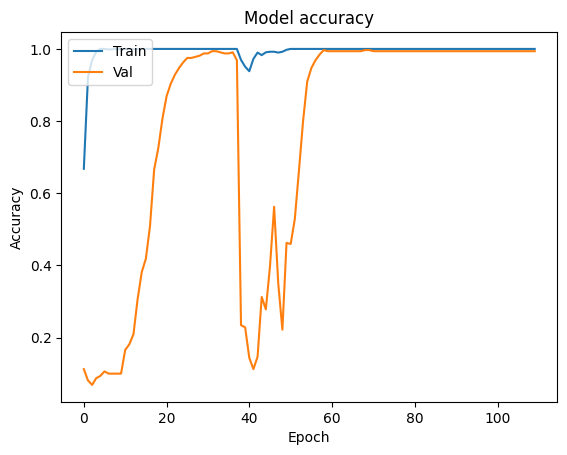

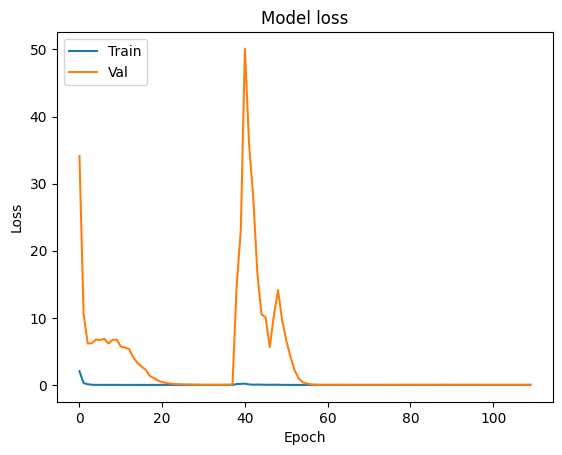

Validation Accuracy: 99.37%
Validation loss: 0.01


<Figure size 640x480 with 0 Axes>

In [32]:
import matplotlib.pyplot as plt
## We show the final results
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()
plt.clf()


# Plot training & validation loss values
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()
plt.clf()

# We print the final accuracy and loss for the test set.
val_acc = hist.history['val_accuracy'][-1]
val_loss = hist.history['val_loss'][-1]
print("Validation Accuracy: {:.2f}%".format(val_acc * 100))
print("Validation loss: {:.2f}".format(val_loss))

2023-04-21 22:53:13.411267: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


13/13 [==============================] - 3s 114ms/step
Testing Accuracy: 74.50%
Testing loss: 1.39


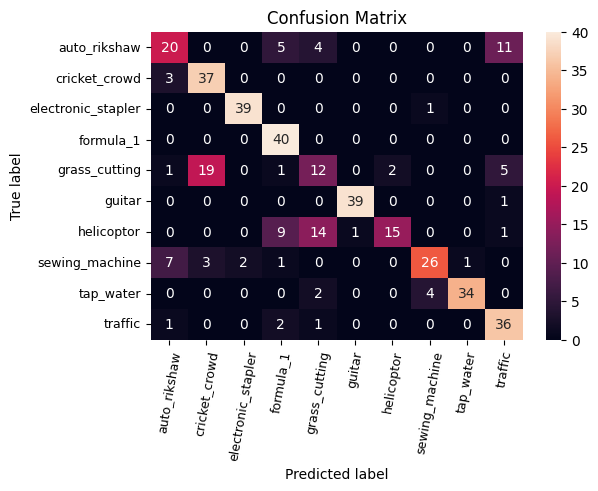

In [33]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(X_test).argmax(axis=-1)
y_true = y_test.argmax(axis=-1)

cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix as a heatmap
fig, ax = plt.subplots(figsize=(6, 4))
conf=sns.heatmap(cm, annot=True, fmt='d')
conf.set_xticklabels(['auto_rikshaw','cricket_crowd','electronic_stapler','formula_1','grass_cutting','guitar','helicoptor','sewing_machine','tap_water','traffic'])
conf.set_yticklabels(['auto_rikshaw','cricket_crowd','electronic_stapler','formula_1','grass_cutting','guitar','helicoptor','sewing_machine','tap_water','traffic'])

# We print the final accuracy and loss for the test set.
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Testing Accuracy: {:.2f}%".format(test_accuracy * 100))
print("Testing loss: {:.2f}".format(test_loss))

# Customize the plot,1,1
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.xticks(rotation=80)
plt.yticks(rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

7/7 [==============================] - 1s 105ms/step
Testing Accuracy: 59.00%
Testing loss: 3.07


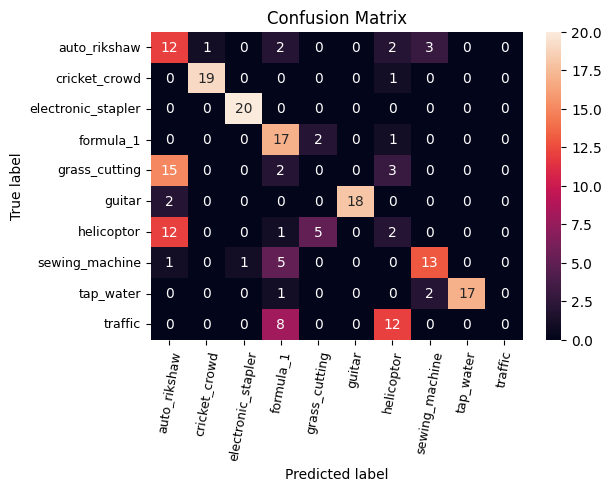

In [34]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(X_final_04).argmax(axis=-1)
y_true = y_final_04.argmax(axis=-1)

cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix as a heatmap
fig, ax = plt.subplots(figsize=(6, 4))
conf=sns.heatmap(cm, annot=True, fmt='d')
conf.set_xticklabels(['auto_rikshaw','cricket_crowd','electronic_stapler','formula_1','grass_cutting','guitar','helicoptor','sewing_machine','tap_water','traffic'])
conf.set_yticklabels(['auto_rikshaw','cricket_crowd','electronic_stapler','formula_1','grass_cutting','guitar','helicoptor','sewing_machine','tap_water','traffic'])

# We print the final accuracy and loss for the test set.
test_loss, test_accuracy = model.evaluate(X_final_04, y_final_04, verbose=0)
print("Testing Accuracy: {:.2f}%".format(test_accuracy * 100))
print("Testing loss: {:.2f}".format(test_loss))

# Customize the plot,1,1
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.xticks(rotation=80)
plt.yticks(rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

7/7 [==============================] - 1s 104ms/step


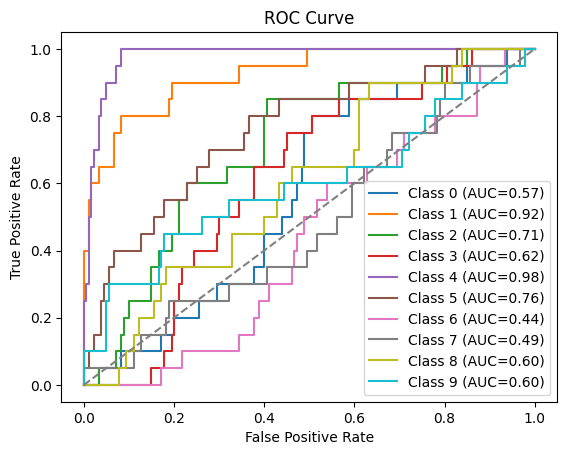

In [35]:
# We draw the ROC curve
from sklearn.metrics import roc_curve, auc
y_pred_proba = model.predict(X_final_005)
fpr = {}
tpr = {}
roc_auc = {}

for i in range(10):
    fpr[i], tpr[i], thresholds = roc_curve(y_final_005[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
for i in range(10):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC={roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()